In [311]:
import numpy as np
import pandas as pd
import matplotlib .pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from catboost import *
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from catboost import cv
from sklearn.model_selection import GridSearchCV
import sklearn
from sklearn import metrics
import shap
from numpy import exp
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [3]:
# Установка параметров отображения для вывода полного датасета
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)

In [135]:
# Установка параметров отображения по умолчанию
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')
pd.reset_option('display.width')

In [4]:
df = pd.read_csv('ECGCvdata.csv')

In [5]:
df.head()

RECORD   hbpermin      Pseg     PQseg    QRSseg     QRseg     QTseg  \
0       1  74.925669  0.076508  0.108889  0.088254  0.043571  0.193016   
1       2  68.503469  0.072483  0.096181  0.093924  0.046267  0.193490   
2       3  83.488603  0.071154  0.086610  0.039530  0.018590  0.132479   
3       4  68.503469  0.082812  0.108160  0.090365  0.045226  0.188802   
4       5  82.080000  0.070760  0.102632  0.101023  0.049415  0.193713   

      RSseg     STseg      Tseg     PTseg    ECGseg  QRtoQSdur  RStoQSdur  \
0  0.044683  0.104762  0.130476  0.301905  0.426111   0.001371   0.001406   
1  0.047656  0.099566  0.089149  0.289670  0.366667   0.001368   0.001409   
2  0.020940  0.092949  0.094444  0.219088  0.293234        NaN        NaN   
3  0.045139  0.098437  0.088281  0.296962  0.373177   0.001390   0.001388   
4  0.051608  0.092690  0.085965  0.296345  0.375073   0.001359   0.001419   

       RRmean      PPmean      PQdis    PonQdis      PRdis    PonRdis  \
0  291.794118  291.735294  39.151151  55.148893  54.827069  70.827385   
1  318.387097  318.322581  34.588437  46.487006  51.262389  63.167131   
2  259.763158  259.526316  31.266226  42.537823  38.131268  49.406028   
3  312.838710  312.838710  38.941666  54.777178  55.231585  71.070510   
4  260.783784  260.864865  37.005130  49.974799  54.786419  67.760629   

       PSdis    PonSdis       PTdis     PonTdis    PToffdis      QRdis  \
0  70.913729  86.912740  108.647070  124.647077  137.911820  15.721401   
1  68.422595  80.323968  104.225842  116.129083  119.935662  16.736067   
2  45.867323  57.141210   79.238234   90.526725   94.765239   6.896067   
3  71.486752  87.324123  106.903236  122.741968  118.451693  16.358555   
4  73.381032  86.352452  106.756792  119.729781  122.189359  17.821022   

       QSdis      QTdis   QToffdis      RSdis      RTdis   RToffdis  \
0  31.764732  69.501920  98.765699  16.129107  53.827711  83.091597   
1  33.838787  69.648183  85.356467  17.212920  52.973059  68.682955   
2  14.606442  48.013021  63.531840   7.751319  41.142777  56.664243   
3  32.548432  67.970906  79.518074  16.321751  51.684188  63.232731   
4  36.378386  69.758819  85.190191  18.630945  51.976614  67.409454   

       STdis   SToffdis  PonToffdis  PonPQang    PQRang     QRSang    RSTang  \
0  37.738343  67.001231  153.911765  1.245455 -5.127081   8.356354 -4.774444   
1  35.811162  51.518178  131.838710  2.151593 -6.003337   9.217430 -5.355692   
2  33.408047  48.926073  106.052868       NaN       NaN        NaN       NaN   
3  35.424510  46.970449  134.290324       NaN -6.253180  10.293861 -6.035961   
4  33.382822  48.812632  135.162163  1.791385 -4.646931   7.254628 -4.489193   

   STToffang  RRTot  NNTot       SDRR        IBIM      IBISD        SDSD  \
0   0.870490     35     34  17.132321  291.794118  17.389965   27.158481   
1   1.370320     32     31  10.612462  318.387097  10.787886    9.665517   
2   2.999565     39     38  84.512981  259.763158  85.647434  111.816694   
3   1.462617     32     31  11.416165  312.838710  11.604875   11.193252   
4   1.382357     38     37  35.771146  260.783784  36.264564   60.245998   

        RMSSD    QRSarea    QRSperi   PQslope   QRslope   RSslope   STslope  \
0  292.296636  18.457618  63.615239 -0.014364  0.075270 -0.070846  0.012606   
1  318.563915  23.043230  67.787773 -0.021207  0.083773 -0.077458  0.016175   
2  273.165412  10.756353  29.253827 -0.042542       NaN       NaN  0.027131   
3  313.046941  23.845086  65.228737 -0.017806  0.091591 -0.088559  0.017022   
4  263.225676  20.942791  72.830353 -0.016650  0.064547 -0.062246  0.016191   

   NN50      pNN50 ECG_signal  
0     2   5.882353        ARR  
1     1   3.225806        ARR  
2    16  42.105263        ARR  
3     2   6.451613        ARR  
4     2   5.405405        ARR

# EDA

In [6]:
df.shape

(1200, 56)

In [7]:
df.columns

Index(['RECORD', 'hbpermin', 'Pseg', 'PQseg', 'QRSseg', 'QRseg', 'QTseg',
       'RSseg', 'STseg', 'Tseg', 'PTseg', 'ECGseg', 'QRtoQSdur', 'RStoQSdur',
       'RRmean', 'PPmean', 'PQdis', 'PonQdis', 'PRdis', 'PonRdis', 'PSdis',
       'PonSdis', 'PTdis', 'PonTdis', 'PToffdis', 'QRdis', 'QSdis', 'QTdis',
       'QToffdis', 'RSdis', 'RTdis', 'RToffdis', 'STdis', 'SToffdis',
       'PonToffdis', 'PonPQang', 'PQRang', 'QRSang', 'RSTang', 'STToffang',
       'RRTot', 'NNTot', 'SDRR', 'IBIM', 'IBISD', 'SDSD', 'RMSSD', 'QRSarea',
       'QRSperi', 'PQslope', 'QRslope', 'RSslope', 'STslope', 'NN50', 'pNN50',
       'ECG_signal'],
      dtype='object')

In [8]:
df.isnull().sum()

RECORD          0
hbpermin        0
Pseg            0
PQseg           0
QRSseg          0
QRseg           0
QTseg           0
RSseg           0
STseg           0
Tseg            0
PTseg           0
ECGseg          0
QRtoQSdur     769
RStoQSdur     769
RRmean          0
PPmean          0
PQdis           0
PonQdis         0
PRdis           0
PonRdis         0
PSdis           0
PonSdis         0
PTdis           0
PonTdis         0
PToffdis        0
QRdis           0
QSdis           0
QTdis           0
QToffdis        0
RSdis           0
RTdis           0
RToffdis        0
STdis           0
SToffdis        0
PonToffdis      0
PonPQang      557
PQRang        768
QRSang        769
RSTang        769
STToffang     426
RRTot           0
NNTot           0
SDRR            0
IBIM            0
IBISD           0
SDSD            0
RMSSD           0
QRSarea         0
QRSperi         0
PQslope         0
QRslope       768
RSslope       769
STslope         0
NN50            0
pNN50           0
ECG_signal

Заменим пропущенные значения в столбцах с помощью метода интерполяции:

In [9]:
df.interpolate(method='linear', inplace=True)

In [10]:
df[30:51]

RECORD    hbpermin      Pseg     PQseg    QRSseg     QRseg     QTseg  \
30      31   75.223881  0.076984  0.102143  0.094603  0.047937  0.195397   
31      32   73.074627  0.065114  0.073039  0.095670  0.050163  0.196977   
32      33   77.373134  0.079552  0.101389  0.097068  0.049614  0.199614   
33      34   19.343284  0.092593  0.083951  0.109259  0.057099  0.203704   
34      35   62.328358  0.064751  0.108238  0.090421  0.044923  0.146648   
35      36   53.731343  0.053778  0.134333  0.094556  0.047000  0.175111   
36      37   90.720000  0.078241  0.088690  0.093585  0.047090  0.196495   
37      38   45.134328  0.059656  0.071164  0.036376  0.018386  0.145635   
38      39  143.429138  0.081177  0.096517  0.118740  0.061277  0.209411   
39      40   68.503469  0.043837  0.106771  0.088108  0.044618  0.187413   
40      41   79.207136  0.061111  0.050150  0.005105  0.002477  0.105180   
41      42   86.400000  0.052569  0.080903  0.039792  0.020903  0.147292   
42      43   60.179104  0.064782  0.053175  0.003671  0.001885  0.103671   
43      44   94.567164  0.059912  0.052146  0.002399  0.001136  0.102210   
44      45   70.644202  0.068519  0.054545  0.000000  0.000000  0.100000   
45      46   85.629336  0.045833  0.049931  0.081667  0.040000  0.185069   
46      47   53.518335  0.088000  0.104222  0.096556  0.048778  0.198556   
47      48   62.081269  0.060824  0.050000  0.000000  0.000000  0.100000   
48      49   49.432836  0.067391  0.097585  0.089493  0.045169  0.191787   
49      50   73.074627  0.049918  0.044526  0.079493  0.038889  0.156863   
50      51   64.477612  0.058519  0.050926  0.000000  0.000000  0.100000   

       RSseg     STseg      Tseg     PTseg    ECGseg  QRtoQSdur  RStoQSdur  \
30  0.046667  0.100794  0.095952  0.297540  0.379524   0.001406   0.001372   
31  0.045507  0.101307  0.127614  0.270016  0.386111   0.001456   0.001321   
32  0.047454  0.102546  0.111420  0.301003  0.399769   0.001420   0.001358   
33  0.052160  0.094444  0.096914  0.287654  0.387963   0.001449   0.001329   
34  0.045498  0.056226  0.104885  0.254885  0.372318   0.001380   0.001398   
35  0.047556  0.080556  0.085556  0.309444  0.386111   0.001380   0.001397   
36  0.046495  0.102910  0.101720  0.285185  0.375265   0.001398   0.001380   
37  0.017989  0.109259  0.098677  0.216799  0.299339   0.001401   0.001377   
38  0.057463  0.090672  0.070937  0.305929  0.392993   0.001404   0.001374   
39  0.043490  0.099306  0.095399  0.294184  0.357639   0.001407   0.001371   
40  0.002628  0.100075  0.093844  0.155330  0.217342   0.001406   0.001371   
41  0.018889  0.107500  0.075417  0.228194  0.280694   0.001406   0.001372   
42  0.001786  0.100000  0.080060  0.156845  0.214980   0.001405   0.001372   
43  0.001263  0.099811  0.092487  0.154356  0.214646   0.001405   0.001373   
44  0.000000  0.100000  0.076515  0.154545  0.211869   0.001404   0.001374   
45  0.041667  0.103403  0.104722  0.235000  0.323958   0.001404   0.001374   
46  0.047778  0.102000  0.105222  0.302778  0.398111   0.001403   0.001375   
47  0.000000  0.100000  0.082088  0.150000  0.194349   0.001402   0.001375   
48  0.044324  0.102295  0.102536  0.289372  0.357126   0.001402   0.001376   
49  0.040605  0.077369  0.102941  0.201389  0.297222   0.001397   0.001381   
50  0.000000  0.100000  0.085000  0.150926  0.198056   0.001392   0.001386   

         RRmean       PPmean      PQdis    PonQdis      PRdis    PonRdis  \
30   281.323529   281.411765  36.828090  50.090787  54.093133  67.357874   
31   288.606061   288.545455  26.256599  37.882569  44.304874  55.943941   
32   275.600000   275.714286  36.549025  52.116690  54.405530  69.977824   
33  1122.875000  1120.500000  30.005970  48.377306  50.254058  68.629458   
34   345.464286   345.464286  38.968275  51.787222  55.148107  67.970556   
35   391.666667   391.166667  48.501598  58.167510  65.378304  75.045265   
36   235.853659   235.829268  31.911268  44.906150  48.859438  61.860569   
37   4

In [11]:
df.isnull().sum()

RECORD        0
hbpermin      0
Pseg          0
PQseg         0
QRSseg        0
QRseg         0
QTseg         0
RSseg         0
STseg         0
Tseg          0
PTseg         0
ECGseg        0
QRtoQSdur     0
RStoQSdur     0
RRmean        0
PPmean        0
PQdis         0
PonQdis       0
PRdis         0
PonRdis       0
PSdis         0
PonSdis       0
PTdis         0
PonTdis       0
PToffdis      0
QRdis         0
QSdis         0
QTdis         0
QToffdis      0
RSdis         0
RTdis         0
RToffdis      0
STdis         0
SToffdis      0
PonToffdis    0
PonPQang      0
PQRang        0
QRSang        0
RSTang        0
STToffang     0
RRTot         0
NNTot         0
SDRR          0
IBIM          0
IBISD         0
SDSD          0
RMSSD         0
QRSarea       0
QRSperi       0
PQslope       0
QRslope       0
RSslope       0
STslope       0
NN50          0
pNN50         0
ECG_signal    0
dtype: int64

как видим пропусков не осталось

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 56 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RECORD      1200 non-null   int64  
 1   hbpermin    1200 non-null   float64
 2   Pseg        1200 non-null   float64
 3   PQseg       1200 non-null   float64
 4   QRSseg      1200 non-null   float64
 5   QRseg       1200 non-null   float64
 6   QTseg       1200 non-null   float64
 7   RSseg       1200 non-null   float64
 8   STseg       1200 non-null   float64
 9   Tseg        1200 non-null   float64
 10  PTseg       1200 non-null   float64
 11  ECGseg      1200 non-null   float64
 12  QRtoQSdur   1200 non-null   float64
 13  RStoQSdur   1200 non-null   float64
 14  RRmean      1200 non-null   float64
 15  PPmean      1200 non-null   float64
 16  PQdis       1200 non-null   float64
 17  PonQdis     1200 non-null   float64
 18  PRdis       1200 non-null   float64
 19  PonRdis     1200 non-null  

In [13]:
data = df[['hbpermin', 'Pseg', 'PQseg', 'QRSseg', 'QRseg', 'QTseg',
       'RSseg', 'STseg', 'Tseg', 'PTseg', 'ECGseg', 'QRtoQSdur', 'RStoQSdur',
       'RRmean', 'PPmean', 'PQdis', 'PonQdis', 'PRdis', 'PonRdis', 'PSdis',
       'PonSdis', 'PTdis', 'PonTdis', 'PToffdis', 'QRdis', 'QSdis', 'QTdis',
       'QToffdis', 'RSdis', 'RTdis', 'RToffdis', 'STdis', 'SToffdis',
       'PonToffdis', 'PonPQang', 'PQRang', 'QRSang', 'RSTang', 'STToffang',
       'RRTot', 'NNTot', 'SDRR', 'IBIM', 'IBISD', 'SDSD', 'RMSSD', 'QRSarea',
       'QRSperi', 'PQslope', 'QRslope', 'RSslope', 'STslope', 'NN50', 'pNN50']]

In [14]:
df['ECG_signal'].value_counts()

ARR    300
AFF    300
CHF    300
NSR    300
Name: ECG_signal, dtype: int64

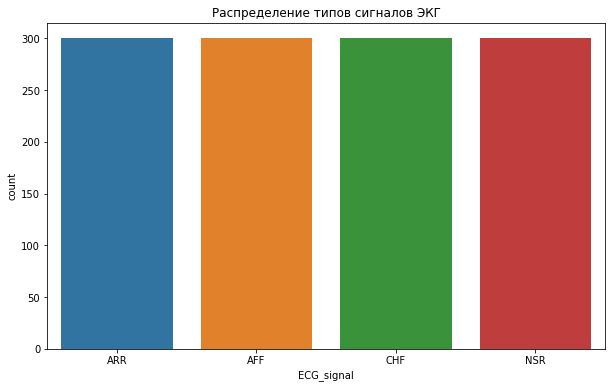

In [207]:
plt.figure(figsize=(10, 6))
sns.countplot(x='ECG_signal', data=df)
plt.title('Распределение типов сигналов ЭКГ')
plt.show()

Каждый класс содержит одинаковое количество объектов, следовательно при классификации балансировать классы нет необходимости.

The figure layout has changed to tight


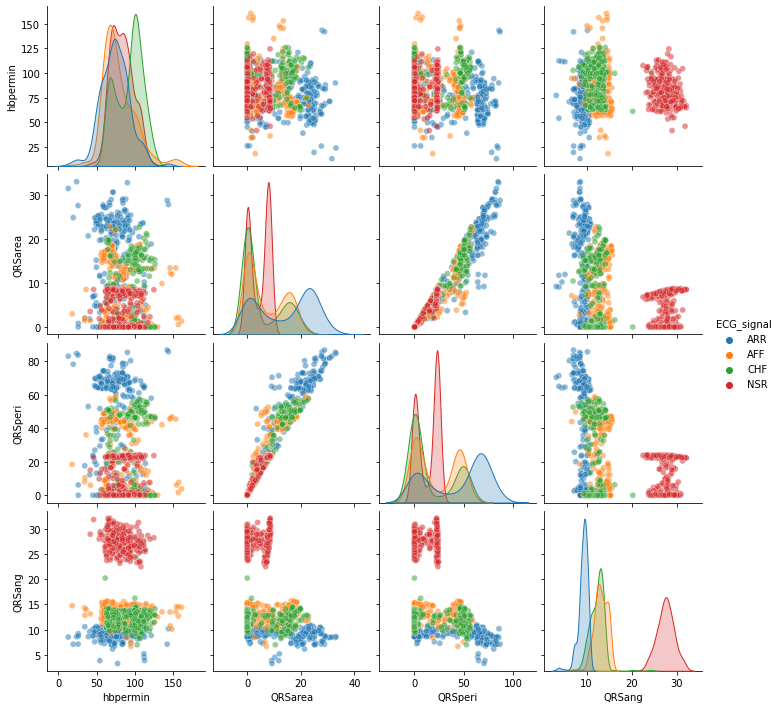

In [210]:
# Графики попарного рассеяния для факторов «hbpermin», «QRSarea», «QRSperi» и «QRSang» для каждого типа сигнала ЭКГ
sns.pairplot(df, vars=['hbpermin', 'QRSarea', 'QRSperi', 'QRSang'], hue='ECG_signal', plot_kws={'alpha': 0.5})
plt.show()

Проверим некоторые переменные на наличие выбросов и аномалий:

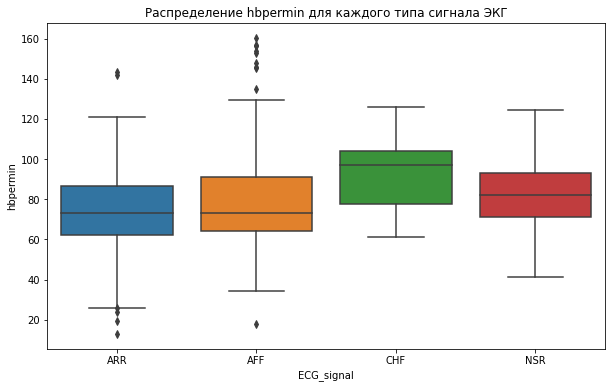

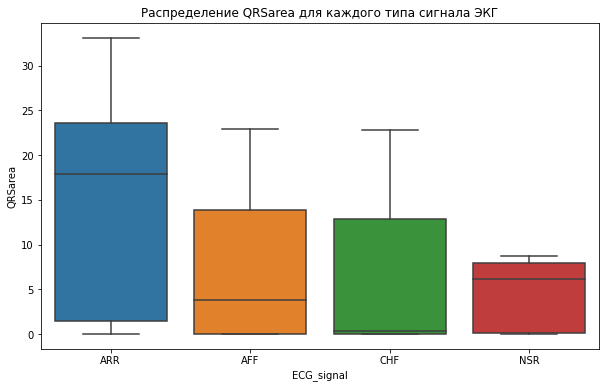

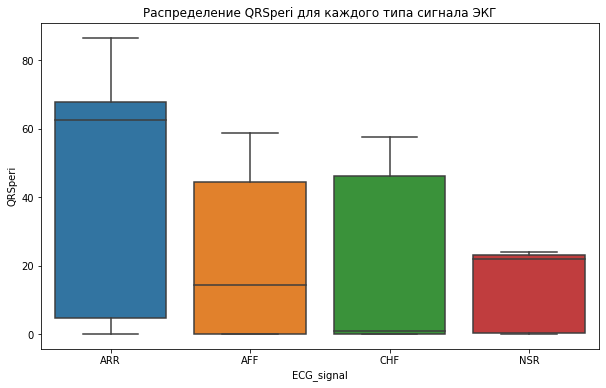

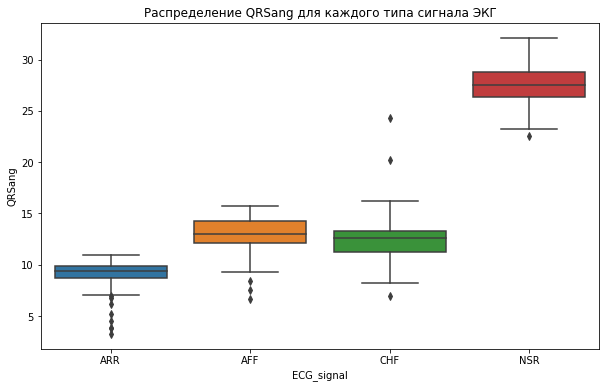

In [209]:
features = ['hbpermin', 'QRSarea', 'QRSperi', 'QRSang']

for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='ECG_signal', y=feature, data=df)
    plt.title(f'Распределение {feature} для каждого типа сигнала ЭКГ')
    plt.show()

По диаграмме "ящик с усами" (box plot) видно, что признаки имеют нормальное распределение и в них практически отсутствуют выбросы, следовательно данные не требуют подготовки для дальнейшей работы с ними, графики попарного рассеяния, построенные ранее, это также подтверждают.

In [15]:
# Определение факторных признаков и результативного признака
X = df.iloc[:,1:55]
y = df['ECG_signal']

Разобьем выборку на тестовую и тренировочную:

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=42)

In [18]:
N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 
print ('Размеры выборок:\n обучающая - ', N_train, '\n тестовая - ', N_test)

Размеры выборок:
 обучающая -  720 
 тестовая -  480


# Gradient boosting with CatBoost

In [247]:
model = CatBoostClassifier(
    iterations=200,
    random_seed=63,
    learning_rate=0.2,
    custom_metric=['AUC', 'Accuracy']
)

model.fit(X_train, y_train,
          eval_set=(X_test, y_test),
          verbose=25,
          plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.0467085	test: 1.0705920	best: 1.0705920 (0)	total: 25.5ms	remaining: 5.07s
25:	learn: 0.0785500	test: 0.1397172	best: 0.1397172 (25)	total: 569ms	remaining: 3.81s
50:	learn: 0.0307464	test: 0.0957277	best: 0.0957277 (50)	total: 1.1s	remaining: 3.22s
75:	learn: 0.0175683	test: 0.0833542	best: 0.0833542 (75)	total: 1.64s	remaining: 2.67s
100:	learn: 0.0124861	test: 0.0778190	best: 0.0771791 (97)	total: 2.17s	remaining: 2.13s
125:	learn: 0.0094012	test: 0.0738602	best: 0.0738602 (125)	total: 2.7s	remaining: 1.58s
150:	learn: 0.0074872	test: 0.0705160	best: 0.0700628 (146)	total: 3.23s	remaining: 1.05s
175:	learn: 0.0061174	test: 0.0710237	best: 0.0700628 (146)	total: 3.77s	remaining: 515ms
199:	learn: 0.0051060	test: 0.0713769	best: 0.0700628 (146)	total: 4.29s	remaining: 0us

bestTest = 0.070062754
bestIteration = 146

Shrink model to first 147 iterations.


In [248]:
score = model.score(X_test, y_test)

tree_count = model.tree_count_

In [249]:
# прогноз вероятности принадлежности объектов тестовой выборки к каждому классу,
y_prob = model.predict_proba(X_test)
# а затем вычисление общего значения метрики AUC
auc = roc_auc_score(y_test, y_prob, multi_class='ovr')

### Вывод результатов классификации. Оценка модели по метрикам

In [251]:
print(f"Confusion matrix: \n{confusion_matrix(y_test, model.predict(X_test))}")
print(f"Model is fitted: {str(model.is_fitted())}")
print(f"Model params: {model.get_params()}")
print(f"Classifier Score: {score} \nClassifier Report: ")
print(classification_report(y_test, model.predict(X_test)), "\n\n")
print(f"AUC: {auc}")
print(f"Tree count: {tree_count}")

Confusion matrix: 
[[118   0  11   0]
 [  0 120   0   0]
 [  1   0 120   0]
 [  0   0   0 110]]
Model is fitted: True
Model params: {'iterations': 200, 'learning_rate': 0.2, 'random_seed': 63, 'custom_metric': ['AUC', 'Accuracy']}
Classifier Score: 0.975 
Classifier Report: 
              precision    recall  f1-score   support

         AFF       0.99      0.91      0.95       129
         ARR       1.00      1.00      1.00       120
         CHF       0.92      0.99      0.95       121
         NSR       1.00      1.00      1.00       110

    accuracy                           0.97       480
   macro avg       0.98      0.98      0.98       480
weighted avg       0.98      0.97      0.97       480
 


AUC: 0.9988714124762698
Tree count: 147


Интерпретация матрицы неточности:   

1. Истинный класс: AFF (первая строка)   
118 объектов класса AFF были правильно предсказаны как класс AFF (True Positive).   
11 объектов класса AFF были неправильно предсказаны как другой класс (False Negative).   

2. Истинный класс: ARR (вторая строка)   
120 объектов класса ARR были правильно предсказаны как класс ARR (True Positive).   
Ни одного объекта класса ARR не было неправильно предсказано как другой класс (False Negative).   

3. Истинный класс: CHF (третья строка)   
120 объектов класса CHF были правильно предсказаны как класс CHF (True Positive).   
1 объекта класса CHF были неправильно предсказаны как другой класс (False Negative).   

4. Истинный класс: NSR (четвертая строка)   
110 объектов класса NSR были правильно предсказаны как класс NSR (True Positive).   
Ни одного объекта класса NSR не было неправильно предсказано как другой класс (False Negative).   

ИТОГО: верных прогнозов - 468,   
       ошибочных прогнозов - 12.   

### Встроенная кросс-валидация (Cross Validation) для выбора оптимального числа итераций

In [254]:
params = {
    'loss_function': 'MultiClass',
    'iterations': 200,
    'custom_metric': ['AUC', 'Accuracy'],
    'random_seed': 63,
    'learning_rate': 0.22
}

cv_data = cv(
    params=params,
    pool=Pool(X, label=y),
    fold_count=5, # Разбивка выборки на 5 частей
    shuffle=True, # Перемешивание данных
    partition_random_seed=0,
    plot=True,
    stratified=True, # сохранение баланса классов во время кросс-валидации
    verbose=False
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.01782356596
bestIteration = 199

Training on fold [1/5]

bestTest = 0.04415774939
bestIteration = 138

Training on fold [2/5]

bestTest = 0.03028365789
bestIteration = 197

Training on fold [3/5]

bestTest = 0.03484716467
bestIteration = 199

Training on fold [4/5]

bestTest = 0.03789576083
bestIteration = 192



In [255]:
best_value = np.min(cv_data['test-MultiClass-mean'])
best_iter = np.argmin(cv_data['test-MultiClass-mean'])
print("Best validation MultiClass score, stratified: {:.4f}+/-{:.3f} on step {}".format(
best_value, cv_data['test-MultiClass-std'][best_iter], best_iter))

Best validation MultiClass score, stratified: 0.0332+/-0.010 on step 199


Подбор наилучших параметров модели с помощью кросс-валидации:

In [242]:
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'iterations': [50, 100, 200, 300],
}

In [243]:
model_best = CatBoostClassifier()

In [244]:
grid = GridSearchCV(model_best, param_grid, cv=5)
grid.fit(X_train, y_train)

0:	learn: 1.3691329	total: 24ms	remaining: 1.17s
1:	learn: 1.3520119	total: 43.2ms	remaining: 1.04s
2:	learn: 1.3330079	total: 63.7ms	remaining: 998ms
3:	learn: 1.3169114	total: 83.4ms	remaining: 959ms
4:	learn: 1.3009316	total: 104ms	remaining: 932ms
5:	learn: 1.2822757	total: 123ms	remaining: 902ms
6:	learn: 1.2680886	total: 144ms	remaining: 883ms
7:	learn: 1.2510544	total: 163ms	remaining: 854ms
8:	learn: 1.2391345	total: 183ms	remaining: 834ms
9:	learn: 1.2225623	total: 204ms	remaining: 815ms
10:	learn: 1.2092143	total: 224ms	remaining: 795ms
11:	learn: 1.1939361	total: 245ms	remaining: 776ms
12:	learn: 1.1797488	total: 266ms	remaining: 756ms
13:	learn: 1.1648569	total: 286ms	remaining: 734ms
14:	learn: 1.1507582	total: 305ms	remaining: 713ms
15:	learn: 1.1389884	total: 325ms	remaining: 690ms
16:	learn: 1.1258526	total: 346ms	remaining: 672ms
17:	learn: 1.1121664	total: 366ms	remaining: 651ms
18:	learn: 1.1002975	total: 386ms	remaining: 631ms
19:	learn: 1.0858117	total: 407ms	remai

15:	learn: 1.1342907	total: 326ms	remaining: 693ms
16:	learn: 1.1209753	total: 346ms	remaining: 673ms
17:	learn: 1.1073142	total: 367ms	remaining: 652ms
18:	learn: 1.0947019	total: 388ms	remaining: 632ms
19:	learn: 1.0801090	total: 408ms	remaining: 613ms
20:	learn: 1.0684255	total: 430ms	remaining: 593ms
21:	learn: 1.0558033	total: 452ms	remaining: 575ms
22:	learn: 1.0438774	total: 473ms	remaining: 555ms
23:	learn: 1.0314846	total: 494ms	remaining: 535ms
24:	learn: 1.0200090	total: 516ms	remaining: 516ms
25:	learn: 1.0087728	total: 537ms	remaining: 495ms
26:	learn: 0.9983824	total: 558ms	remaining: 475ms
27:	learn: 0.9879919	total: 579ms	remaining: 455ms
28:	learn: 0.9760755	total: 599ms	remaining: 434ms
29:	learn: 0.9647341	total: 621ms	remaining: 414ms
30:	learn: 0.9540183	total: 643ms	remaining: 394ms
31:	learn: 0.9432714	total: 664ms	remaining: 373ms
32:	learn: 0.9335377	total: 685ms	remaining: 353ms
33:	learn: 0.9226512	total: 704ms	remaining: 331ms
34:	learn: 0.9144958	total: 724

33:	learn: 0.3043131	total: 694ms	remaining: 327ms
34:	learn: 0.2968154	total: 714ms	remaining: 306ms
35:	learn: 0.2876751	total: 734ms	remaining: 285ms
36:	learn: 0.2798693	total: 755ms	remaining: 265ms
37:	learn: 0.2713197	total: 776ms	remaining: 245ms
38:	learn: 0.2638930	total: 795ms	remaining: 224ms
39:	learn: 0.2563317	total: 815ms	remaining: 204ms
40:	learn: 0.2488534	total: 836ms	remaining: 183ms
41:	learn: 0.2413322	total: 856ms	remaining: 163ms
42:	learn: 0.2345537	total: 877ms	remaining: 143ms
43:	learn: 0.2272541	total: 897ms	remaining: 122ms
44:	learn: 0.2214422	total: 918ms	remaining: 102ms
45:	learn: 0.2159654	total: 940ms	remaining: 81.7ms
46:	learn: 0.2116560	total: 962ms	remaining: 61.4ms
47:	learn: 0.2066772	total: 982ms	remaining: 40.9ms
48:	learn: 0.2009774	total: 1s	remaining: 20.5ms
49:	learn: 0.1970502	total: 1.02s	remaining: 0us
0:	learn: 1.3073236	total: 19.1ms	remaining: 936ms
1:	learn: 1.2307343	total: 38.5ms	remaining: 924ms
2:	learn: 1.1475904	total: 58.9m

0:	learn: 1.2210218	total: 26.7ms	remaining: 1.31s
1:	learn: 1.0880392	total: 47.3ms	remaining: 1.13s
2:	learn: 0.9628244	total: 69.8ms	remaining: 1.09s
3:	learn: 0.8619477	total: 90.5ms	remaining: 1.04s
4:	learn: 0.7858310	total: 111ms	remaining: 995ms
5:	learn: 0.7081463	total: 130ms	remaining: 955ms
6:	learn: 0.6526694	total: 152ms	remaining: 932ms
7:	learn: 0.5970516	total: 174ms	remaining: 915ms
8:	learn: 0.5596468	total: 195ms	remaining: 889ms
9:	learn: 0.5099599	total: 217ms	remaining: 868ms
10:	learn: 0.4782527	total: 237ms	remaining: 841ms
11:	learn: 0.4432977	total: 258ms	remaining: 816ms
12:	learn: 0.4151328	total: 279ms	remaining: 793ms
13:	learn: 0.3858089	total: 300ms	remaining: 772ms
14:	learn: 0.3610582	total: 320ms	remaining: 747ms
15:	learn: 0.3372306	total: 341ms	remaining: 725ms
16:	learn: 0.3164076	total: 362ms	remaining: 702ms
17:	learn: 0.2949757	total: 384ms	remaining: 683ms
18:	learn: 0.2792071	total: 406ms	remaining: 662ms
19:	learn: 0.2630856	total: 427ms	rem

20:	learn: 0.2532282	total: 425ms	remaining: 587ms
21:	learn: 0.2391794	total: 445ms	remaining: 567ms
22:	learn: 0.2271764	total: 465ms	remaining: 546ms
23:	learn: 0.2167144	total: 487ms	remaining: 528ms
24:	learn: 0.2074535	total: 508ms	remaining: 508ms
25:	learn: 0.1960242	total: 528ms	remaining: 488ms
26:	learn: 0.1874027	total: 549ms	remaining: 467ms
27:	learn: 0.1802059	total: 568ms	remaining: 447ms
28:	learn: 0.1741469	total: 589ms	remaining: 426ms
29:	learn: 0.1665156	total: 609ms	remaining: 406ms
30:	learn: 0.1613293	total: 631ms	remaining: 386ms
31:	learn: 0.1545611	total: 651ms	remaining: 366ms
32:	learn: 0.1487782	total: 671ms	remaining: 346ms
33:	learn: 0.1432568	total: 693ms	remaining: 326ms
34:	learn: 0.1378987	total: 713ms	remaining: 306ms
35:	learn: 0.1332820	total: 734ms	remaining: 285ms
36:	learn: 0.1286309	total: 755ms	remaining: 265ms
37:	learn: 0.1243400	total: 777ms	remaining: 245ms
38:	learn: 0.1215381	total: 797ms	remaining: 225ms
39:	learn: 0.1164668	total: 817

32:	learn: 0.0625723	total: 670ms	remaining: 345ms
33:	learn: 0.0604429	total: 690ms	remaining: 325ms
34:	learn: 0.0581238	total: 712ms	remaining: 305ms
35:	learn: 0.0566864	total: 733ms	remaining: 285ms
36:	learn: 0.0553330	total: 754ms	remaining: 265ms
37:	learn: 0.0532051	total: 775ms	remaining: 245ms
38:	learn: 0.0513083	total: 795ms	remaining: 224ms
39:	learn: 0.0498129	total: 817ms	remaining: 204ms
40:	learn: 0.0480971	total: 837ms	remaining: 184ms
41:	learn: 0.0461548	total: 856ms	remaining: 163ms
42:	learn: 0.0446927	total: 877ms	remaining: 143ms
43:	learn: 0.0430249	total: 897ms	remaining: 122ms
44:	learn: 0.0408481	total: 917ms	remaining: 102ms
45:	learn: 0.0390805	total: 937ms	remaining: 81.5ms
46:	learn: 0.0387300	total: 958ms	remaining: 61.1ms
47:	learn: 0.0382522	total: 978ms	remaining: 40.8ms
48:	learn: 0.0364198	total: 998ms	remaining: 20.4ms
49:	learn: 0.0354335	total: 1.02s	remaining: 0us
0:	learn: 1.0913319	total: 19.2ms	remaining: 940ms
1:	learn: 0.8291645	total: 39

0:	learn: 1.3691329	total: 19.8ms	remaining: 1.96s
1:	learn: 1.3520119	total: 39.8ms	remaining: 1.95s
2:	learn: 1.3330079	total: 60.1ms	remaining: 1.94s
3:	learn: 1.3169114	total: 80.3ms	remaining: 1.93s
4:	learn: 1.3009316	total: 102ms	remaining: 1.93s
5:	learn: 1.2822757	total: 123ms	remaining: 1.92s
6:	learn: 1.2680886	total: 144ms	remaining: 1.91s
7:	learn: 1.2510544	total: 164ms	remaining: 1.88s
8:	learn: 1.2391345	total: 185ms	remaining: 1.87s
9:	learn: 1.2225623	total: 206ms	remaining: 1.86s
10:	learn: 1.2092143	total: 227ms	remaining: 1.84s
11:	learn: 1.1939361	total: 249ms	remaining: 1.83s
12:	learn: 1.1797488	total: 269ms	remaining: 1.8s
13:	learn: 1.1648569	total: 289ms	remaining: 1.77s
14:	learn: 1.1507582	total: 309ms	remaining: 1.75s
15:	learn: 1.1389884	total: 330ms	remaining: 1.73s
16:	learn: 1.1258526	total: 351ms	remaining: 1.71s
17:	learn: 1.1121664	total: 371ms	remaining: 1.69s
18:	learn: 1.1002975	total: 391ms	remaining: 1.67s
19:	learn: 1.0858117	total: 411ms	rema

70:	learn: 0.6438209	total: 1.45s	remaining: 591ms
71:	learn: 0.6385709	total: 1.47s	remaining: 570ms
72:	learn: 0.6331339	total: 1.49s	remaining: 550ms
73:	learn: 0.6274633	total: 1.51s	remaining: 529ms
74:	learn: 0.6222846	total: 1.53s	remaining: 509ms
75:	learn: 0.6173407	total: 1.55s	remaining: 489ms
76:	learn: 0.6123452	total: 1.57s	remaining: 469ms
77:	learn: 0.6076110	total: 1.59s	remaining: 449ms
78:	learn: 0.6025126	total: 1.61s	remaining: 428ms
79:	learn: 0.5968799	total: 1.63s	remaining: 408ms
80:	learn: 0.5917692	total: 1.65s	remaining: 388ms
81:	learn: 0.5870630	total: 1.67s	remaining: 367ms
82:	learn: 0.5823228	total: 1.69s	remaining: 347ms
83:	learn: 0.5778528	total: 1.71s	remaining: 326ms
84:	learn: 0.5729644	total: 1.73s	remaining: 306ms
85:	learn: 0.5682919	total: 1.75s	remaining: 285ms
86:	learn: 0.5639989	total: 1.77s	remaining: 265ms
87:	learn: 0.5588745	total: 1.79s	remaining: 245ms
88:	learn: 0.5542515	total: 1.81s	remaining: 224ms
89:	learn: 0.5498889	total: 1.8

40:	learn: 0.8595048	total: 839ms	remaining: 1.21s
41:	learn: 0.8500397	total: 858ms	remaining: 1.19s
42:	learn: 0.8405613	total: 878ms	remaining: 1.16s
43:	learn: 0.8332655	total: 899ms	remaining: 1.14s
44:	learn: 0.8250922	total: 919ms	remaining: 1.12s
45:	learn: 0.8173333	total: 939ms	remaining: 1.1s
46:	learn: 0.8093348	total: 960ms	remaining: 1.08s
47:	learn: 0.8015280	total: 980ms	remaining: 1.06s
48:	learn: 0.7933773	total: 1s	remaining: 1.04s
49:	learn: 0.7849519	total: 1.02s	remaining: 1.02s
50:	learn: 0.7771718	total: 1.04s	remaining: 1s
51:	learn: 0.7701737	total: 1.06s	remaining: 979ms
52:	learn: 0.7635061	total: 1.08s	remaining: 959ms
53:	learn: 0.7563024	total: 1.1s	remaining: 940ms
54:	learn: 0.7481899	total: 1.12s	remaining: 920ms
55:	learn: 0.7417264	total: 1.14s	remaining: 899ms
56:	learn: 0.7355050	total: 1.17s	remaining: 879ms
57:	learn: 0.7288921	total: 1.19s	remaining: 859ms
58:	learn: 0.7233423	total: 1.21s	remaining: 839ms
59:	learn: 0.7161405	total: 1.23s	remai

10:	learn: 0.7592861	total: 231ms	remaining: 1.87s
11:	learn: 0.7232547	total: 252ms	remaining: 1.84s
12:	learn: 0.6920573	total: 272ms	remaining: 1.82s
13:	learn: 0.6608321	total: 292ms	remaining: 1.79s
14:	learn: 0.6328704	total: 312ms	remaining: 1.77s
15:	learn: 0.6092217	total: 332ms	remaining: 1.74s
16:	learn: 0.5843268	total: 352ms	remaining: 1.72s
17:	learn: 0.5597612	total: 373ms	remaining: 1.7s
18:	learn: 0.5398160	total: 392ms	remaining: 1.67s
19:	learn: 0.5158318	total: 412ms	remaining: 1.65s
20:	learn: 0.4965106	total: 433ms	remaining: 1.63s
21:	learn: 0.4783569	total: 454ms	remaining: 1.61s
22:	learn: 0.4611963	total: 475ms	remaining: 1.59s
23:	learn: 0.4434286	total: 495ms	remaining: 1.57s
24:	learn: 0.4280782	total: 516ms	remaining: 1.55s
25:	learn: 0.4131570	total: 536ms	remaining: 1.52s
26:	learn: 0.3976341	total: 557ms	remaining: 1.51s
27:	learn: 0.3850245	total: 577ms	remaining: 1.48s
28:	learn: 0.3715492	total: 598ms	remaining: 1.46s
29:	learn: 0.3604220	total: 618m

81:	learn: 0.1102175	total: 1.67s	remaining: 368ms
82:	learn: 0.1084398	total: 1.7s	remaining: 347ms
83:	learn: 0.1071640	total: 1.72s	remaining: 327ms
84:	learn: 0.1055717	total: 1.74s	remaining: 307ms
85:	learn: 0.1038430	total: 1.76s	remaining: 286ms
86:	learn: 0.1028046	total: 1.78s	remaining: 266ms
87:	learn: 0.1018140	total: 1.8s	remaining: 245ms
88:	learn: 0.1001804	total: 1.82s	remaining: 225ms
89:	learn: 0.0991915	total: 1.84s	remaining: 204ms
90:	learn: 0.0979899	total: 1.86s	remaining: 184ms
91:	learn: 0.0968282	total: 1.88s	remaining: 164ms
92:	learn: 0.0957535	total: 1.9s	remaining: 143ms
93:	learn: 0.0944741	total: 1.92s	remaining: 123ms
94:	learn: 0.0928878	total: 1.94s	remaining: 102ms
95:	learn: 0.0917639	total: 1.96s	remaining: 81.8ms
96:	learn: 0.0905701	total: 1.98s	remaining: 61.4ms
97:	learn: 0.0894673	total: 2s	remaining: 40.9ms
98:	learn: 0.0885541	total: 2.02s	remaining: 20.4ms
99:	learn: 0.0876924	total: 2.04s	remaining: 0us
0:	learn: 1.3073236	total: 19.9ms	r

50:	learn: 0.2005553	total: 1.05s	remaining: 1.01s
51:	learn: 0.1951492	total: 1.07s	remaining: 985ms
52:	learn: 0.1909916	total: 1.09s	remaining: 964ms
53:	learn: 0.1867874	total: 1.11s	remaining: 943ms
54:	learn: 0.1824720	total: 1.13s	remaining: 923ms
55:	learn: 0.1785037	total: 1.15s	remaining: 903ms
56:	learn: 0.1751941	total: 1.17s	remaining: 882ms
57:	learn: 0.1710866	total: 1.19s	remaining: 861ms
58:	learn: 0.1675979	total: 1.21s	remaining: 840ms
59:	learn: 0.1639179	total: 1.23s	remaining: 821ms
60:	learn: 0.1604785	total: 1.25s	remaining: 801ms
61:	learn: 0.1572979	total: 1.27s	remaining: 780ms
62:	learn: 0.1546923	total: 1.29s	remaining: 760ms
63:	learn: 0.1515346	total: 1.31s	remaining: 739ms
64:	learn: 0.1486126	total: 1.33s	remaining: 718ms
65:	learn: 0.1454354	total: 1.35s	remaining: 698ms
66:	learn: 0.1427445	total: 1.38s	remaining: 678ms
67:	learn: 0.1400568	total: 1.4s	remaining: 657ms
68:	learn: 0.1373753	total: 1.42s	remaining: 637ms
69:	learn: 0.1347669	total: 1.44

17:	learn: 0.2949757	total: 368ms	remaining: 1.68s
18:	learn: 0.2792071	total: 389ms	remaining: 1.66s
19:	learn: 0.2630856	total: 412ms	remaining: 1.65s
20:	learn: 0.2502629	total: 433ms	remaining: 1.63s
21:	learn: 0.2377533	total: 453ms	remaining: 1.6s
22:	learn: 0.2256914	total: 474ms	remaining: 1.58s
23:	learn: 0.2160632	total: 494ms	remaining: 1.56s
24:	learn: 0.2072079	total: 514ms	remaining: 1.54s
25:	learn: 0.1964215	total: 534ms	remaining: 1.52s
26:	learn: 0.1866160	total: 554ms	remaining: 1.5s
27:	learn: 0.1777128	total: 575ms	remaining: 1.48s
28:	learn: 0.1699315	total: 594ms	remaining: 1.46s
29:	learn: 0.1617287	total: 615ms	remaining: 1.43s
30:	learn: 0.1555871	total: 635ms	remaining: 1.41s
31:	learn: 0.1480080	total: 656ms	remaining: 1.39s
32:	learn: 0.1413015	total: 677ms	remaining: 1.37s
33:	learn: 0.1361916	total: 697ms	remaining: 1.35s
34:	learn: 0.1309247	total: 718ms	remaining: 1.33s
35:	learn: 0.1275212	total: 739ms	remaining: 1.31s
36:	learn: 0.1227130	total: 760ms

82:	learn: 0.0460140	total: 1.75s	remaining: 358ms
83:	learn: 0.0448394	total: 1.77s	remaining: 337ms
84:	learn: 0.0440583	total: 1.79s	remaining: 316ms
85:	learn: 0.0431000	total: 1.81s	remaining: 295ms
86:	learn: 0.0423060	total: 1.83s	remaining: 274ms
87:	learn: 0.0416614	total: 1.85s	remaining: 253ms
88:	learn: 0.0408673	total: 1.88s	remaining: 232ms
89:	learn: 0.0399987	total: 1.9s	remaining: 211ms
90:	learn: 0.0396709	total: 1.92s	remaining: 190ms
91:	learn: 0.0390480	total: 1.94s	remaining: 168ms
92:	learn: 0.0382874	total: 1.96s	remaining: 147ms
93:	learn: 0.0379151	total: 1.98s	remaining: 126ms
94:	learn: 0.0377447	total: 2s	remaining: 105ms
95:	learn: 0.0371028	total: 2.02s	remaining: 84.1ms
96:	learn: 0.0363678	total: 2.04s	remaining: 63ms
97:	learn: 0.0360017	total: 2.06s	remaining: 42ms
98:	learn: 0.0354955	total: 2.08s	remaining: 21ms
99:	learn: 0.0350783	total: 2.1s	remaining: 0us
0:	learn: 1.2317113	total: 20.5ms	remaining: 2.03s
1:	learn: 1.0956204	total: 41.2ms	remain

51:	learn: 0.0846652	total: 1.08s	remaining: 1s
52:	learn: 0.0833644	total: 1.1s	remaining: 979ms
53:	learn: 0.0811678	total: 1.13s	remaining: 959ms
54:	learn: 0.0787490	total: 1.15s	remaining: 939ms
55:	learn: 0.0770127	total: 1.17s	remaining: 918ms
56:	learn: 0.0750668	total: 1.19s	remaining: 897ms
57:	learn: 0.0736411	total: 1.21s	remaining: 875ms
58:	learn: 0.0722348	total: 1.23s	remaining: 854ms
59:	learn: 0.0707624	total: 1.25s	remaining: 833ms
60:	learn: 0.0696425	total: 1.27s	remaining: 813ms
61:	learn: 0.0684079	total: 1.29s	remaining: 792ms
62:	learn: 0.0671474	total: 1.31s	remaining: 772ms
63:	learn: 0.0659225	total: 1.33s	remaining: 751ms
64:	learn: 0.0644267	total: 1.35s	remaining: 730ms
65:	learn: 0.0627732	total: 1.38s	remaining: 708ms
66:	learn: 0.0613781	total: 1.4s	remaining: 688ms
67:	learn: 0.0604764	total: 1.42s	remaining: 667ms
68:	learn: 0.0594543	total: 1.44s	remaining: 646ms
69:	learn: 0.0578344	total: 1.46s	remaining: 625ms
70:	learn: 0.0566484	total: 1.48s	re

21:	learn: 0.0945580	total: 466ms	remaining: 1.65s
22:	learn: 0.0880739	total: 488ms	remaining: 1.63s
23:	learn: 0.0836669	total: 512ms	remaining: 1.62s
24:	learn: 0.0785754	total: 535ms	remaining: 1.6s
25:	learn: 0.0739434	total: 558ms	remaining: 1.59s
26:	learn: 0.0706140	total: 582ms	remaining: 1.57s
27:	learn: 0.0682952	total: 605ms	remaining: 1.55s
28:	learn: 0.0655552	total: 627ms	remaining: 1.53s
29:	learn: 0.0626895	total: 650ms	remaining: 1.51s
30:	learn: 0.0609298	total: 670ms	remaining: 1.49s
31:	learn: 0.0577986	total: 690ms	remaining: 1.47s
32:	learn: 0.0562484	total: 711ms	remaining: 1.44s
33:	learn: 0.0548285	total: 734ms	remaining: 1.42s
34:	learn: 0.0527194	total: 756ms	remaining: 1.4s
35:	learn: 0.0523363	total: 778ms	remaining: 1.38s
36:	learn: 0.0507877	total: 798ms	remaining: 1.36s
37:	learn: 0.0484750	total: 818ms	remaining: 1.33s
38:	learn: 0.0471546	total: 839ms	remaining: 1.31s
39:	learn: 0.0461930	total: 859ms	remaining: 1.29s
40:	learn: 0.0440900	total: 880ms

90:	learn: 0.0161516	total: 1.88s	remaining: 186ms
91:	learn: 0.0157686	total: 1.91s	remaining: 166ms
92:	learn: 0.0155347	total: 1.93s	remaining: 145ms
93:	learn: 0.0153960	total: 1.95s	remaining: 124ms
94:	learn: 0.0152689	total: 1.97s	remaining: 104ms
95:	learn: 0.0150915	total: 1.99s	remaining: 82.9ms
96:	learn: 0.0147086	total: 2.01s	remaining: 62.2ms
97:	learn: 0.0142755	total: 2.03s	remaining: 41.5ms
98:	learn: 0.0141504	total: 2.05s	remaining: 20.7ms
99:	learn: 0.0139959	total: 2.07s	remaining: 0us
0:	learn: 1.0913319	total: 19.9ms	remaining: 1.97s
1:	learn: 0.8291645	total: 39.4ms	remaining: 1.93s
2:	learn: 0.6653470	total: 59.5ms	remaining: 1.92s
3:	learn: 0.5448939	total: 79.4ms	remaining: 1.91s
4:	learn: 0.4642674	total: 100ms	remaining: 1.9s
5:	learn: 0.3969497	total: 121ms	remaining: 1.89s
6:	learn: 0.3486622	total: 141ms	remaining: 1.88s
7:	learn: 0.3034365	total: 161ms	remaining: 1.85s
8:	learn: 0.2718366	total: 181ms	remaining: 1.83s
9:	learn: 0.2407307	total: 202ms	re

61:	learn: 0.0251931	total: 1.29s	remaining: 791ms
62:	learn: 0.0247085	total: 1.31s	remaining: 770ms
63:	learn: 0.0241755	total: 1.33s	remaining: 749ms
64:	learn: 0.0237562	total: 1.35s	remaining: 728ms
65:	learn: 0.0234154	total: 1.37s	remaining: 707ms
66:	learn: 0.0228692	total: 1.39s	remaining: 686ms
67:	learn: 0.0224655	total: 1.41s	remaining: 666ms
68:	learn: 0.0222824	total: 1.43s	remaining: 645ms
69:	learn: 0.0216524	total: 1.46s	remaining: 624ms
70:	learn: 0.0211347	total: 1.48s	remaining: 603ms
71:	learn: 0.0207143	total: 1.5s	remaining: 582ms
72:	learn: 0.0205166	total: 1.52s	remaining: 561ms
73:	learn: 0.0200821	total: 1.54s	remaining: 541ms
74:	learn: 0.0198946	total: 1.56s	remaining: 520ms
75:	learn: 0.0195971	total: 1.58s	remaining: 499ms
76:	learn: 0.0192440	total: 1.6s	remaining: 479ms
77:	learn: 0.0188431	total: 1.62s	remaining: 458ms
78:	learn: 0.0187829	total: 1.64s	remaining: 437ms
79:	learn: 0.0184282	total: 1.66s	remaining: 416ms
80:	learn: 0.0181675	total: 1.68s

29:	learn: 0.9690347	total: 627ms	remaining: 3.56s
30:	learn: 0.9590514	total: 649ms	remaining: 3.54s
31:	learn: 0.9485860	total: 672ms	remaining: 3.53s
32:	learn: 0.9380175	total: 694ms	remaining: 3.51s
33:	learn: 0.9278167	total: 714ms	remaining: 3.49s
34:	learn: 0.9193598	total: 735ms	remaining: 3.46s
35:	learn: 0.9104155	total: 757ms	remaining: 3.45s
36:	learn: 0.9003991	total: 778ms	remaining: 3.43s
37:	learn: 0.8907576	total: 799ms	remaining: 3.4s
38:	learn: 0.8827538	total: 819ms	remaining: 3.38s
39:	learn: 0.8733490	total: 839ms	remaining: 3.36s
40:	learn: 0.8647197	total: 860ms	remaining: 3.33s
41:	learn: 0.8556532	total: 880ms	remaining: 3.31s
42:	learn: 0.8465808	total: 901ms	remaining: 3.29s
43:	learn: 0.8383943	total: 929ms	remaining: 3.29s
44:	learn: 0.8305691	total: 949ms	remaining: 3.27s
45:	learn: 0.8231290	total: 969ms	remaining: 3.24s
46:	learn: 0.8154573	total: 990ms	remaining: 3.22s
47:	learn: 0.8076403	total: 1.01s	remaining: 3.2s
48:	learn: 0.7993384	total: 1.03s

189:	learn: 0.2856431	total: 3.94s	remaining: 208ms
190:	learn: 0.2842380	total: 3.97s	remaining: 187ms
191:	learn: 0.2823748	total: 3.99s	remaining: 166ms
192:	learn: 0.2807114	total: 4.01s	remaining: 145ms
193:	learn: 0.2790080	total: 4.03s	remaining: 125ms
194:	learn: 0.2776277	total: 4.05s	remaining: 104ms
195:	learn: 0.2758842	total: 4.07s	remaining: 83ms
196:	learn: 0.2742415	total: 4.09s	remaining: 62.3ms
197:	learn: 0.2723882	total: 4.11s	remaining: 41.5ms
198:	learn: 0.2709381	total: 4.13s	remaining: 20.8ms
199:	learn: 0.2692275	total: 4.15s	remaining: 0us
0:	learn: 1.3709982	total: 19.4ms	remaining: 3.86s
1:	learn: 1.3543237	total: 39.7ms	remaining: 3.93s
2:	learn: 1.3345240	total: 60.4ms	remaining: 3.97s
3:	learn: 1.3166350	total: 80.9ms	remaining: 3.96s
4:	learn: 1.3000114	total: 101ms	remaining: 3.95s
5:	learn: 1.2813300	total: 121ms	remaining: 3.92s
6:	learn: 1.2659068	total: 142ms	remaining: 3.92s
7:	learn: 1.2497918	total: 162ms	remaining: 3.89s
8:	learn: 1.2356612	tota

156:	learn: 0.3389314	total: 3.29s	remaining: 900ms
157:	learn: 0.3367726	total: 3.31s	remaining: 879ms
158:	learn: 0.3347296	total: 3.33s	remaining: 858ms
159:	learn: 0.3322833	total: 3.35s	remaining: 837ms
160:	learn: 0.3301949	total: 3.37s	remaining: 816ms
161:	learn: 0.3279187	total: 3.39s	remaining: 795ms
162:	learn: 0.3259207	total: 3.41s	remaining: 774ms
163:	learn: 0.3235688	total: 3.43s	remaining: 753ms
164:	learn: 0.3214690	total: 3.45s	remaining: 732ms
165:	learn: 0.3193770	total: 3.47s	remaining: 711ms
166:	learn: 0.3176062	total: 3.49s	remaining: 690ms
167:	learn: 0.3156147	total: 3.51s	remaining: 669ms
168:	learn: 0.3138171	total: 3.54s	remaining: 649ms
169:	learn: 0.3118271	total: 3.56s	remaining: 629ms
170:	learn: 0.3099623	total: 3.58s	remaining: 608ms
171:	learn: 0.3081232	total: 3.61s	remaining: 587ms
172:	learn: 0.3063176	total: 3.63s	remaining: 566ms
173:	learn: 0.3043902	total: 3.65s	remaining: 545ms
174:	learn: 0.3026066	total: 3.67s	remaining: 524ms
175:	learn: 

123:	learn: 0.4230147	total: 2.58s	remaining: 1.58s
124:	learn: 0.4200974	total: 2.6s	remaining: 1.56s
125:	learn: 0.4173813	total: 2.62s	remaining: 1.54s
126:	learn: 0.4145055	total: 2.64s	remaining: 1.52s
127:	learn: 0.4119581	total: 2.66s	remaining: 1.5s
128:	learn: 0.4089228	total: 2.68s	remaining: 1.48s
129:	learn: 0.4062486	total: 2.7s	remaining: 1.46s
130:	learn: 0.4038433	total: 2.72s	remaining: 1.43s
131:	learn: 0.4012565	total: 2.75s	remaining: 1.41s
132:	learn: 0.3986821	total: 2.77s	remaining: 1.39s
133:	learn: 0.3961497	total: 2.79s	remaining: 1.37s
134:	learn: 0.3937432	total: 2.81s	remaining: 1.35s
135:	learn: 0.3914969	total: 2.83s	remaining: 1.33s
136:	learn: 0.3889082	total: 2.85s	remaining: 1.31s
137:	learn: 0.3865123	total: 2.87s	remaining: 1.29s
138:	learn: 0.3839466	total: 2.89s	remaining: 1.27s
139:	learn: 0.3811162	total: 2.91s	remaining: 1.25s
140:	learn: 0.3781721	total: 2.93s	remaining: 1.23s
141:	learn: 0.3754269	total: 2.95s	remaining: 1.21s
142:	learn: 0.3

91:	learn: 0.5452073	total: 1.9s	remaining: 2.23s
92:	learn: 0.5407632	total: 1.92s	remaining: 2.21s
93:	learn: 0.5361619	total: 1.94s	remaining: 2.19s
94:	learn: 0.5321654	total: 1.96s	remaining: 2.17s
95:	learn: 0.5275851	total: 1.98s	remaining: 2.15s
96:	learn: 0.5242189	total: 2s	remaining: 2.13s
97:	learn: 0.5204627	total: 2.02s	remaining: 2.11s
98:	learn: 0.5163010	total: 2.04s	remaining: 2.09s
99:	learn: 0.5126194	total: 2.06s	remaining: 2.06s
100:	learn: 0.5084998	total: 2.08s	remaining: 2.04s
101:	learn: 0.5047440	total: 2.1s	remaining: 2.02s
102:	learn: 0.5011022	total: 2.13s	remaining: 2s
103:	learn: 0.4972448	total: 2.15s	remaining: 1.98s
104:	learn: 0.4937202	total: 2.17s	remaining: 1.96s
105:	learn: 0.4907527	total: 2.19s	remaining: 1.94s
106:	learn: 0.4868131	total: 2.21s	remaining: 1.92s
107:	learn: 0.4824624	total: 2.23s	remaining: 1.9s
108:	learn: 0.4788871	total: 2.25s	remaining: 1.88s
109:	learn: 0.4750798	total: 2.27s	remaining: 1.86s
110:	learn: 0.4710806	total: 2

60:	learn: 0.7059855	total: 1.26s	remaining: 2.88s
61:	learn: 0.6994198	total: 1.29s	remaining: 2.86s
62:	learn: 0.6936818	total: 1.31s	remaining: 2.84s
63:	learn: 0.6875132	total: 1.33s	remaining: 2.83s
64:	learn: 0.6815056	total: 1.35s	remaining: 2.81s
65:	learn: 0.6755195	total: 1.37s	remaining: 2.79s
66:	learn: 0.6693287	total: 1.39s	remaining: 2.77s
67:	learn: 0.6634237	total: 1.42s	remaining: 2.75s
68:	learn: 0.6585135	total: 1.44s	remaining: 2.73s
69:	learn: 0.6528820	total: 1.46s	remaining: 2.7s
70:	learn: 0.6485352	total: 1.48s	remaining: 2.69s
71:	learn: 0.6426014	total: 1.5s	remaining: 2.67s
72:	learn: 0.6372237	total: 1.52s	remaining: 2.65s
73:	learn: 0.6316431	total: 1.54s	remaining: 2.62s
74:	learn: 0.6260631	total: 1.56s	remaining: 2.6s
75:	learn: 0.6211940	total: 1.58s	remaining: 2.58s
76:	learn: 0.6157491	total: 1.6s	remaining: 2.56s
77:	learn: 0.6102592	total: 1.62s	remaining: 2.54s
78:	learn: 0.6049302	total: 1.64s	remaining: 2.52s
79:	learn: 0.5992328	total: 1.67s	r

20:	learn: 0.4965106	total: 437ms	remaining: 3.72s
21:	learn: 0.4783569	total: 458ms	remaining: 3.71s
22:	learn: 0.4611963	total: 479ms	remaining: 3.69s
23:	learn: 0.4434286	total: 499ms	remaining: 3.66s
24:	learn: 0.4280782	total: 521ms	remaining: 3.65s
25:	learn: 0.4131570	total: 543ms	remaining: 3.63s
26:	learn: 0.3976341	total: 564ms	remaining: 3.61s
27:	learn: 0.3850245	total: 584ms	remaining: 3.59s
28:	learn: 0.3715492	total: 605ms	remaining: 3.57s
29:	learn: 0.3604220	total: 625ms	remaining: 3.54s
30:	learn: 0.3495628	total: 646ms	remaining: 3.52s
31:	learn: 0.3382253	total: 667ms	remaining: 3.5s
32:	learn: 0.3257928	total: 689ms	remaining: 3.48s
33:	learn: 0.3160653	total: 709ms	remaining: 3.46s
34:	learn: 0.3078470	total: 729ms	remaining: 3.44s
35:	learn: 0.2991481	total: 750ms	remaining: 3.42s
36:	learn: 0.2902970	total: 771ms	remaining: 3.4s
37:	learn: 0.2822055	total: 793ms	remaining: 3.38s
38:	learn: 0.2750606	total: 813ms	remaining: 3.35s
39:	learn: 0.2665161	total: 833ms

180:	learn: 0.0365716	total: 3.76s	remaining: 395ms
181:	learn: 0.0362056	total: 3.78s	remaining: 374ms
182:	learn: 0.0357997	total: 3.8s	remaining: 353ms
183:	learn: 0.0355593	total: 3.82s	remaining: 332ms
184:	learn: 0.0352562	total: 3.84s	remaining: 312ms
185:	learn: 0.0348752	total: 3.86s	remaining: 291ms
186:	learn: 0.0345202	total: 3.88s	remaining: 270ms
187:	learn: 0.0342596	total: 3.9s	remaining: 249ms
188:	learn: 0.0339560	total: 3.93s	remaining: 229ms
189:	learn: 0.0337081	total: 3.95s	remaining: 208ms
190:	learn: 0.0334272	total: 3.97s	remaining: 187ms
191:	learn: 0.0331938	total: 3.99s	remaining: 166ms
192:	learn: 0.0329247	total: 4.01s	remaining: 145ms
193:	learn: 0.0325883	total: 4.03s	remaining: 125ms
194:	learn: 0.0322330	total: 4.05s	remaining: 104ms
195:	learn: 0.0318686	total: 4.07s	remaining: 83.1ms
196:	learn: 0.0315986	total: 4.09s	remaining: 62.3ms
197:	learn: 0.0314094	total: 4.11s	remaining: 41.5ms
198:	learn: 0.0311966	total: 4.13s	remaining: 20.8ms
199:	learn

150:	learn: 0.0504413	total: 3.13s	remaining: 1.02s
151:	learn: 0.0499309	total: 3.15s	remaining: 996ms
152:	learn: 0.0492957	total: 3.18s	remaining: 976ms
153:	learn: 0.0490778	total: 3.2s	remaining: 955ms
154:	learn: 0.0486864	total: 3.22s	remaining: 934ms
155:	learn: 0.0479714	total: 3.24s	remaining: 913ms
156:	learn: 0.0473965	total: 3.26s	remaining: 892ms
157:	learn: 0.0469741	total: 3.28s	remaining: 872ms
158:	learn: 0.0464529	total: 3.3s	remaining: 851ms
159:	learn: 0.0460133	total: 3.32s	remaining: 830ms
160:	learn: 0.0453727	total: 3.34s	remaining: 810ms
161:	learn: 0.0450251	total: 3.36s	remaining: 789ms
162:	learn: 0.0446353	total: 3.38s	remaining: 769ms
163:	learn: 0.0441918	total: 3.41s	remaining: 748ms
164:	learn: 0.0438345	total: 3.43s	remaining: 728ms
165:	learn: 0.0435990	total: 3.45s	remaining: 707ms
166:	learn: 0.0432589	total: 3.48s	remaining: 687ms
167:	learn: 0.0428400	total: 3.5s	remaining: 666ms
168:	learn: 0.0426182	total: 3.52s	remaining: 645ms
169:	learn: 0.0

119:	learn: 0.0693138	total: 2.49s	remaining: 1.66s
120:	learn: 0.0685352	total: 2.51s	remaining: 1.64s
121:	learn: 0.0676837	total: 2.53s	remaining: 1.62s
122:	learn: 0.0669254	total: 2.55s	remaining: 1.6s
123:	learn: 0.0665140	total: 2.57s	remaining: 1.58s
124:	learn: 0.0656140	total: 2.59s	remaining: 1.56s
125:	learn: 0.0652965	total: 2.62s	remaining: 1.54s
126:	learn: 0.0647172	total: 2.64s	remaining: 1.51s
127:	learn: 0.0638252	total: 2.66s	remaining: 1.5s
128:	learn: 0.0633193	total: 2.68s	remaining: 1.47s
129:	learn: 0.0630171	total: 2.7s	remaining: 1.45s
130:	learn: 0.0623720	total: 2.72s	remaining: 1.43s
131:	learn: 0.0615252	total: 2.74s	remaining: 1.41s
132:	learn: 0.0607600	total: 2.77s	remaining: 1.39s
133:	learn: 0.0602978	total: 2.79s	remaining: 1.38s
134:	learn: 0.0597061	total: 2.81s	remaining: 1.35s
135:	learn: 0.0591096	total: 2.84s	remaining: 1.33s
136:	learn: 0.0585732	total: 2.86s	remaining: 1.31s
137:	learn: 0.0582625	total: 2.88s	remaining: 1.29s
138:	learn: 0.0

87:	learn: 0.1039848	total: 1.82s	remaining: 2.32s
88:	learn: 0.1025577	total: 1.84s	remaining: 2.3s
89:	learn: 0.1006485	total: 1.86s	remaining: 2.28s
90:	learn: 0.0992377	total: 1.88s	remaining: 2.26s
91:	learn: 0.0973531	total: 1.91s	remaining: 2.24s
92:	learn: 0.0959538	total: 1.93s	remaining: 2.22s
93:	learn: 0.0942672	total: 1.95s	remaining: 2.2s
94:	learn: 0.0929435	total: 1.97s	remaining: 2.18s
95:	learn: 0.0915509	total: 1.99s	remaining: 2.16s
96:	learn: 0.0904741	total: 2.01s	remaining: 2.14s
97:	learn: 0.0896826	total: 2.04s	remaining: 2.12s
98:	learn: 0.0888506	total: 2.06s	remaining: 2.1s
99:	learn: 0.0877709	total: 2.08s	remaining: 2.08s
100:	learn: 0.0866807	total: 2.1s	remaining: 2.06s
101:	learn: 0.0853545	total: 2.12s	remaining: 2.04s
102:	learn: 0.0840963	total: 2.14s	remaining: 2.02s
103:	learn: 0.0833268	total: 2.16s	remaining: 2s
104:	learn: 0.0823613	total: 2.18s	remaining: 1.97s
105:	learn: 0.0816955	total: 2.2s	remaining: 1.95s
106:	learn: 0.0809294	total: 2.22

55:	learn: 0.1713957	total: 1.16s	remaining: 2.98s
56:	learn: 0.1680439	total: 1.18s	remaining: 2.96s
57:	learn: 0.1651253	total: 1.2s	remaining: 2.94s
58:	learn: 0.1615217	total: 1.22s	remaining: 2.92s
59:	learn: 0.1581012	total: 1.24s	remaining: 2.9s
60:	learn: 0.1550091	total: 1.26s	remaining: 2.88s
61:	learn: 0.1520622	total: 1.28s	remaining: 2.86s
62:	learn: 0.1491770	total: 1.31s	remaining: 2.84s
63:	learn: 0.1462089	total: 1.33s	remaining: 2.82s
64:	learn: 0.1438419	total: 1.35s	remaining: 2.8s
65:	learn: 0.1404650	total: 1.37s	remaining: 2.78s
66:	learn: 0.1379055	total: 1.39s	remaining: 2.76s
67:	learn: 0.1353625	total: 1.41s	remaining: 2.73s
68:	learn: 0.1331719	total: 1.43s	remaining: 2.71s
69:	learn: 0.1307850	total: 1.45s	remaining: 2.69s
70:	learn: 0.1286876	total: 1.47s	remaining: 2.67s
71:	learn: 0.1262679	total: 1.49s	remaining: 2.65s
72:	learn: 0.1239732	total: 1.51s	remaining: 2.63s
73:	learn: 0.1213509	total: 1.53s	remaining: 2.61s
74:	learn: 0.1192460	total: 1.55s	

23:	learn: 0.2160632	total: 497ms	remaining: 3.65s
24:	learn: 0.2072079	total: 518ms	remaining: 3.62s
25:	learn: 0.1964215	total: 538ms	remaining: 3.6s
26:	learn: 0.1866160	total: 559ms	remaining: 3.58s
27:	learn: 0.1777128	total: 579ms	remaining: 3.56s
28:	learn: 0.1699315	total: 600ms	remaining: 3.54s
29:	learn: 0.1617287	total: 620ms	remaining: 3.51s
30:	learn: 0.1555871	total: 640ms	remaining: 3.49s
31:	learn: 0.1480080	total: 661ms	remaining: 3.47s
32:	learn: 0.1413015	total: 683ms	remaining: 3.45s
33:	learn: 0.1361916	total: 703ms	remaining: 3.43s
34:	learn: 0.1309247	total: 725ms	remaining: 3.42s
35:	learn: 0.1275212	total: 746ms	remaining: 3.4s
36:	learn: 0.1227130	total: 768ms	remaining: 3.38s
37:	learn: 0.1194832	total: 788ms	remaining: 3.36s
38:	learn: 0.1160860	total: 808ms	remaining: 3.34s
39:	learn: 0.1121632	total: 829ms	remaining: 3.31s
40:	learn: 0.1094865	total: 850ms	remaining: 3.3s
41:	learn: 0.1068917	total: 870ms	remaining: 3.27s
42:	learn: 0.1031665	total: 890ms	

183:	learn: 0.0132496	total: 3.8s	remaining: 330ms
184:	learn: 0.0131144	total: 3.83s	remaining: 311ms
185:	learn: 0.0130113	total: 3.85s	remaining: 290ms
186:	learn: 0.0128122	total: 3.87s	remaining: 269ms
187:	learn: 0.0127124	total: 3.89s	remaining: 249ms
188:	learn: 0.0126179	total: 3.92s	remaining: 228ms
189:	learn: 0.0125265	total: 3.94s	remaining: 207ms
190:	learn: 0.0124061	total: 3.96s	remaining: 186ms
191:	learn: 0.0123286	total: 3.98s	remaining: 166ms
192:	learn: 0.0122504	total: 4s	remaining: 145ms
193:	learn: 0.0121666	total: 4.02s	remaining: 124ms
194:	learn: 0.0120829	total: 4.04s	remaining: 104ms
195:	learn: 0.0118873	total: 4.06s	remaining: 82.9ms
196:	learn: 0.0118148	total: 4.08s	remaining: 62.1ms
197:	learn: 0.0117327	total: 4.1s	remaining: 41.4ms
198:	learn: 0.0116605	total: 4.12s	remaining: 20.7ms
199:	learn: 0.0115186	total: 4.14s	remaining: 0us
0:	learn: 1.2388217	total: 23ms	remaining: 4.58s
1:	learn: 1.1052409	total: 44.1ms	remaining: 4.37s
2:	learn: 0.9721922

151:	learn: 0.0194431	total: 3.14s	remaining: 991ms
152:	learn: 0.0191577	total: 3.16s	remaining: 970ms
153:	learn: 0.0187919	total: 3.18s	remaining: 949ms
154:	learn: 0.0186138	total: 3.2s	remaining: 929ms
155:	learn: 0.0183740	total: 3.22s	remaining: 908ms
156:	learn: 0.0181211	total: 3.24s	remaining: 887ms
157:	learn: 0.0179634	total: 3.26s	remaining: 867ms
158:	learn: 0.0177684	total: 3.28s	remaining: 846ms
159:	learn: 0.0176474	total: 3.3s	remaining: 826ms
160:	learn: 0.0175142	total: 3.32s	remaining: 805ms
161:	learn: 0.0174777	total: 3.35s	remaining: 785ms
162:	learn: 0.0173426	total: 3.37s	remaining: 764ms
163:	learn: 0.0171353	total: 3.39s	remaining: 743ms
164:	learn: 0.0170372	total: 3.41s	remaining: 723ms
165:	learn: 0.0169704	total: 3.43s	remaining: 702ms
166:	learn: 0.0167619	total: 3.45s	remaining: 682ms
167:	learn: 0.0166142	total: 3.47s	remaining: 661ms
168:	learn: 0.0165063	total: 3.49s	remaining: 640ms
169:	learn: 0.0164633	total: 3.51s	remaining: 620ms
170:	learn: 0.

120:	learn: 0.0279479	total: 2.5s	remaining: 1.63s
121:	learn: 0.0276095	total: 2.52s	remaining: 1.61s
122:	learn: 0.0274358	total: 2.54s	remaining: 1.59s
123:	learn: 0.0269888	total: 2.56s	remaining: 1.57s
124:	learn: 0.0267576	total: 2.58s	remaining: 1.55s
125:	learn: 0.0264340	total: 2.6s	remaining: 1.53s
126:	learn: 0.0260660	total: 2.62s	remaining: 1.51s
127:	learn: 0.0257999	total: 2.64s	remaining: 1.49s
128:	learn: 0.0254718	total: 2.66s	remaining: 1.47s
129:	learn: 0.0252025	total: 2.68s	remaining: 1.45s
130:	learn: 0.0251495	total: 2.71s	remaining: 1.42s
131:	learn: 0.0250865	total: 2.73s	remaining: 1.4s
132:	learn: 0.0247895	total: 2.75s	remaining: 1.38s
133:	learn: 0.0245895	total: 2.77s	remaining: 1.36s
134:	learn: 0.0243355	total: 2.79s	remaining: 1.34s
135:	learn: 0.0240080	total: 2.81s	remaining: 1.32s
136:	learn: 0.0237035	total: 2.83s	remaining: 1.3s
137:	learn: 0.0236011	total: 2.85s	remaining: 1.28s
138:	learn: 0.0233302	total: 2.87s	remaining: 1.26s
139:	learn: 0.02

88:	learn: 0.0410518	total: 1.91s	remaining: 2.38s
89:	learn: 0.0405133	total: 1.93s	remaining: 2.36s
90:	learn: 0.0398941	total: 1.95s	remaining: 2.34s
91:	learn: 0.0392875	total: 1.97s	remaining: 2.32s
92:	learn: 0.0387075	total: 1.99s	remaining: 2.29s
93:	learn: 0.0380266	total: 2.01s	remaining: 2.27s
94:	learn: 0.0374386	total: 2.03s	remaining: 2.25s
95:	learn: 0.0371053	total: 2.06s	remaining: 2.23s
96:	learn: 0.0366298	total: 2.08s	remaining: 2.21s
97:	learn: 0.0362105	total: 2.1s	remaining: 2.18s
98:	learn: 0.0358498	total: 2.12s	remaining: 2.16s
99:	learn: 0.0354328	total: 2.14s	remaining: 2.14s
100:	learn: 0.0350328	total: 2.16s	remaining: 2.12s
101:	learn: 0.0346319	total: 2.18s	remaining: 2.1s
102:	learn: 0.0338174	total: 2.2s	remaining: 2.07s
103:	learn: 0.0334555	total: 2.22s	remaining: 2.05s
104:	learn: 0.0330548	total: 2.24s	remaining: 2.03s
105:	learn: 0.0326220	total: 2.27s	remaining: 2.01s
106:	learn: 0.0321312	total: 2.29s	remaining: 1.99s
107:	learn: 0.0315685	total

57:	learn: 0.0691840	total: 1.2s	remaining: 2.95s
58:	learn: 0.0673280	total: 1.22s	remaining: 2.93s
59:	learn: 0.0655426	total: 1.25s	remaining: 2.91s
60:	learn: 0.0643053	total: 1.27s	remaining: 2.88s
61:	learn: 0.0630595	total: 1.29s	remaining: 2.87s
62:	learn: 0.0615398	total: 1.31s	remaining: 2.85s
63:	learn: 0.0602162	total: 1.33s	remaining: 2.83s
64:	learn: 0.0591157	total: 1.35s	remaining: 2.8s
65:	learn: 0.0580480	total: 1.37s	remaining: 2.78s
66:	learn: 0.0569405	total: 1.39s	remaining: 2.76s
67:	learn: 0.0559586	total: 1.41s	remaining: 2.74s
68:	learn: 0.0550385	total: 1.43s	remaining: 2.72s
69:	learn: 0.0537061	total: 1.45s	remaining: 2.7s
70:	learn: 0.0526302	total: 1.47s	remaining: 2.67s
71:	learn: 0.0518175	total: 1.49s	remaining: 2.66s
72:	learn: 0.0502388	total: 1.51s	remaining: 2.64s
73:	learn: 0.0495683	total: 1.54s	remaining: 2.62s
74:	learn: 0.0487741	total: 1.56s	remaining: 2.59s
75:	learn: 0.0481152	total: 1.58s	remaining: 2.57s
76:	learn: 0.0473700	total: 1.6s	r

25:	learn: 0.0739434	total: 550ms	remaining: 3.68s
26:	learn: 0.0706140	total: 571ms	remaining: 3.66s
27:	learn: 0.0682952	total: 590ms	remaining: 3.63s
28:	learn: 0.0655552	total: 610ms	remaining: 3.6s
29:	learn: 0.0626895	total: 633ms	remaining: 3.58s
30:	learn: 0.0609298	total: 652ms	remaining: 3.56s
31:	learn: 0.0577986	total: 672ms	remaining: 3.53s
32:	learn: 0.0562484	total: 692ms	remaining: 3.5s
33:	learn: 0.0548285	total: 713ms	remaining: 3.48s
34:	learn: 0.0527194	total: 734ms	remaining: 3.46s
35:	learn: 0.0523363	total: 756ms	remaining: 3.44s
36:	learn: 0.0507877	total: 776ms	remaining: 3.42s
37:	learn: 0.0484750	total: 797ms	remaining: 3.4s
38:	learn: 0.0471546	total: 818ms	remaining: 3.38s
39:	learn: 0.0461930	total: 838ms	remaining: 3.35s
40:	learn: 0.0440900	total: 858ms	remaining: 3.33s
41:	learn: 0.0421628	total: 878ms	remaining: 3.3s
42:	learn: 0.0407323	total: 899ms	remaining: 3.28s
43:	learn: 0.0394469	total: 919ms	remaining: 3.26s
44:	learn: 0.0377867	total: 939ms	r

186:	learn: 0.0053396	total: 3.86s	remaining: 269ms
187:	learn: 0.0053075	total: 3.88s	remaining: 248ms
188:	learn: 0.0052653	total: 3.9s	remaining: 227ms
189:	learn: 0.0052308	total: 3.92s	remaining: 207ms
190:	learn: 0.0052189	total: 3.94s	remaining: 186ms
191:	learn: 0.0051824	total: 3.96s	remaining: 165ms
192:	learn: 0.0051551	total: 3.99s	remaining: 145ms
193:	learn: 0.0051280	total: 4.01s	remaining: 124ms
194:	learn: 0.0051096	total: 4.03s	remaining: 103ms
195:	learn: 0.0050558	total: 4.05s	remaining: 82.6ms
196:	learn: 0.0050256	total: 4.07s	remaining: 62ms
197:	learn: 0.0050045	total: 4.09s	remaining: 41.3ms
198:	learn: 0.0049792	total: 4.11s	remaining: 20.7ms
199:	learn: 0.0049123	total: 4.13s	remaining: 0us
0:	learn: 1.1044191	total: 19.6ms	remaining: 3.89s
1:	learn: 0.8957566	total: 40.2ms	remaining: 3.98s
2:	learn: 0.7204281	total: 61.2ms	remaining: 4.02s
3:	learn: 0.5939846	total: 81.2ms	remaining: 3.98s
4:	learn: 0.5028936	total: 101ms	remaining: 3.95s
5:	learn: 0.4231539

156:	learn: 0.0079666	total: 3.25s	remaining: 890ms
157:	learn: 0.0078926	total: 3.27s	remaining: 869ms
158:	learn: 0.0078322	total: 3.29s	remaining: 849ms
159:	learn: 0.0078209	total: 3.31s	remaining: 828ms
160:	learn: 0.0077342	total: 3.33s	remaining: 807ms
161:	learn: 0.0076580	total: 3.35s	remaining: 786ms
162:	learn: 0.0075868	total: 3.37s	remaining: 766ms
163:	learn: 0.0075322	total: 3.39s	remaining: 745ms
164:	learn: 0.0074944	total: 3.41s	remaining: 724ms
165:	learn: 0.0074784	total: 3.44s	remaining: 704ms
166:	learn: 0.0074279	total: 3.46s	remaining: 683ms
167:	learn: 0.0073556	total: 3.48s	remaining: 662ms
168:	learn: 0.0072670	total: 3.5s	remaining: 642ms
169:	learn: 0.0072461	total: 3.52s	remaining: 621ms
170:	learn: 0.0072150	total: 3.54s	remaining: 600ms
171:	learn: 0.0071179	total: 3.56s	remaining: 579ms
172:	learn: 0.0070782	total: 3.58s	remaining: 558ms
173:	learn: 0.0070420	total: 3.6s	remaining: 538ms
174:	learn: 0.0069918	total: 3.62s	remaining: 517ms
175:	learn: 0.

124:	learn: 0.0109412	total: 2.57s	remaining: 1.54s
125:	learn: 0.0107862	total: 2.59s	remaining: 1.52s
126:	learn: 0.0106821	total: 2.61s	remaining: 1.5s
127:	learn: 0.0105781	total: 2.63s	remaining: 1.48s
128:	learn: 0.0104212	total: 2.65s	remaining: 1.46s
129:	learn: 0.0103440	total: 2.67s	remaining: 1.44s
130:	learn: 0.0102451	total: 2.69s	remaining: 1.42s
131:	learn: 0.0101858	total: 2.71s	remaining: 1.4s
132:	learn: 0.0100664	total: 2.73s	remaining: 1.38s
133:	learn: 0.0100085	total: 2.75s	remaining: 1.36s
134:	learn: 0.0098912	total: 2.77s	remaining: 1.33s
135:	learn: 0.0096940	total: 2.79s	remaining: 1.31s
136:	learn: 0.0095795	total: 2.81s	remaining: 1.29s
137:	learn: 0.0095321	total: 2.84s	remaining: 1.27s
138:	learn: 0.0094141	total: 2.86s	remaining: 1.25s
139:	learn: 0.0093990	total: 2.88s	remaining: 1.23s
140:	learn: 0.0093330	total: 2.9s	remaining: 1.21s
141:	learn: 0.0092381	total: 2.92s	remaining: 1.19s
142:	learn: 0.0090977	total: 2.94s	remaining: 1.17s
143:	learn: 0.0

93:	learn: 0.0149150	total: 1.96s	remaining: 2.21s
94:	learn: 0.0146870	total: 1.98s	remaining: 2.18s
95:	learn: 0.0145524	total: 2s	remaining: 2.16s
96:	learn: 0.0143796	total: 2.02s	remaining: 2.14s
97:	learn: 0.0142034	total: 2.04s	remaining: 2.12s
98:	learn: 0.0140621	total: 2.06s	remaining: 2.1s
99:	learn: 0.0139425	total: 2.08s	remaining: 2.08s
100:	learn: 0.0137704	total: 2.1s	remaining: 2.06s
101:	learn: 0.0136470	total: 2.12s	remaining: 2.04s
102:	learn: 0.0135304	total: 2.14s	remaining: 2.02s
103:	learn: 0.0133673	total: 2.16s	remaining: 2s
104:	learn: 0.0132421	total: 2.18s	remaining: 1.98s
105:	learn: 0.0131171	total: 2.2s	remaining: 1.95s
106:	learn: 0.0129296	total: 2.23s	remaining: 1.94s
107:	learn: 0.0127397	total: 2.25s	remaining: 1.92s
108:	learn: 0.0124949	total: 2.27s	remaining: 1.89s
109:	learn: 0.0123547	total: 2.29s	remaining: 1.87s
110:	learn: 0.0121471	total: 2.31s	remaining: 1.85s
111:	learn: 0.0120862	total: 2.33s	remaining: 1.83s
112:	learn: 0.0118145	total:

62:	learn: 0.0239518	total: 1.3s	remaining: 2.83s
63:	learn: 0.0235473	total: 1.32s	remaining: 2.81s
64:	learn: 0.0231170	total: 1.34s	remaining: 2.79s
65:	learn: 0.0227891	total: 1.36s	remaining: 2.77s
66:	learn: 0.0221625	total: 1.39s	remaining: 2.75s
67:	learn: 0.0217333	total: 1.41s	remaining: 2.73s
68:	learn: 0.0216200	total: 1.43s	remaining: 2.71s
69:	learn: 0.0212167	total: 1.45s	remaining: 2.69s
70:	learn: 0.0208772	total: 1.47s	remaining: 2.67s
71:	learn: 0.0204458	total: 1.49s	remaining: 2.65s
72:	learn: 0.0200235	total: 1.51s	remaining: 2.63s
73:	learn: 0.0197182	total: 1.53s	remaining: 2.61s
74:	learn: 0.0192700	total: 1.55s	remaining: 2.58s
75:	learn: 0.0189406	total: 1.57s	remaining: 2.56s
76:	learn: 0.0186712	total: 1.59s	remaining: 2.54s
77:	learn: 0.0183579	total: 1.61s	remaining: 2.52s
78:	learn: 0.0179788	total: 1.63s	remaining: 2.5s
79:	learn: 0.0177694	total: 1.66s	remaining: 2.48s
80:	learn: 0.0174440	total: 1.68s	remaining: 2.46s
81:	learn: 0.0171898	total: 1.7s	

31:	learn: 0.9485860	total: 660ms	remaining: 5.52s
32:	learn: 0.9380175	total: 681ms	remaining: 5.51s
33:	learn: 0.9278167	total: 701ms	remaining: 5.48s
34:	learn: 0.9193598	total: 721ms	remaining: 5.46s
35:	learn: 0.9104155	total: 742ms	remaining: 5.44s
36:	learn: 0.9003991	total: 764ms	remaining: 5.43s
37:	learn: 0.8907576	total: 785ms	remaining: 5.41s
38:	learn: 0.8827538	total: 805ms	remaining: 5.39s
39:	learn: 0.8733490	total: 826ms	remaining: 5.37s
40:	learn: 0.8647197	total: 845ms	remaining: 5.34s
41:	learn: 0.8556532	total: 867ms	remaining: 5.33s
42:	learn: 0.8465808	total: 888ms	remaining: 5.3s
43:	learn: 0.8383943	total: 910ms	remaining: 5.29s
44:	learn: 0.8305691	total: 932ms	remaining: 5.28s
45:	learn: 0.8231290	total: 953ms	remaining: 5.26s
46:	learn: 0.8154573	total: 975ms	remaining: 5.25s
47:	learn: 0.8076403	total: 995ms	remaining: 5.22s
48:	learn: 0.7993384	total: 1.01s	remaining: 5.2s
49:	learn: 0.7924152	total: 1.03s	remaining: 5.17s
50:	learn: 0.7843181	total: 1.05s

192:	learn: 0.2807114	total: 3.99s	remaining: 2.21s
193:	learn: 0.2790080	total: 4.01s	remaining: 2.19s
194:	learn: 0.2776277	total: 4.03s	remaining: 2.17s
195:	learn: 0.2758842	total: 4.05s	remaining: 2.15s
196:	learn: 0.2742415	total: 4.07s	remaining: 2.13s
197:	learn: 0.2723882	total: 4.09s	remaining: 2.11s
198:	learn: 0.2709381	total: 4.11s	remaining: 2.09s
199:	learn: 0.2692275	total: 4.13s	remaining: 2.06s
200:	learn: 0.2677593	total: 4.15s	remaining: 2.04s
201:	learn: 0.2663832	total: 4.17s	remaining: 2.02s
202:	learn: 0.2649398	total: 4.19s	remaining: 2s
203:	learn: 0.2634103	total: 4.21s	remaining: 1.98s
204:	learn: 0.2620805	total: 4.23s	remaining: 1.96s
205:	learn: 0.2603018	total: 4.25s	remaining: 1.94s
206:	learn: 0.2589977	total: 4.28s	remaining: 1.92s
207:	learn: 0.2575533	total: 4.3s	remaining: 1.9s
208:	learn: 0.2560276	total: 4.32s	remaining: 1.88s
209:	learn: 0.2548272	total: 4.34s	remaining: 1.86s
210:	learn: 0.2533479	total: 4.36s	remaining: 1.84s
211:	learn: 0.252

52:	learn: 0.7612305	total: 1.09s	remaining: 5.09s
53:	learn: 0.7535934	total: 1.11s	remaining: 5.07s
54:	learn: 0.7455959	total: 1.13s	remaining: 5.05s
55:	learn: 0.7379860	total: 1.15s	remaining: 5.03s
56:	learn: 0.7317709	total: 1.17s	remaining: 5.01s
57:	learn: 0.7246573	total: 1.2s	remaining: 4.99s
58:	learn: 0.7173361	total: 1.22s	remaining: 4.96s
59:	learn: 0.7098898	total: 1.24s	remaining: 4.95s
60:	learn: 0.7032367	total: 1.26s	remaining: 4.92s
61:	learn: 0.6966825	total: 1.28s	remaining: 4.91s
62:	learn: 0.6906152	total: 1.3s	remaining: 4.89s
63:	learn: 0.6841711	total: 1.32s	remaining: 4.87s
64:	learn: 0.6782891	total: 1.34s	remaining: 4.85s
65:	learn: 0.6717929	total: 1.36s	remaining: 4.84s
66:	learn: 0.6652778	total: 1.39s	remaining: 4.82s
67:	learn: 0.6594996	total: 1.41s	remaining: 4.8s
68:	learn: 0.6541803	total: 1.43s	remaining: 4.78s
69:	learn: 0.6483885	total: 1.45s	remaining: 4.76s
70:	learn: 0.6438209	total: 1.47s	remaining: 4.73s
71:	learn: 0.6385709	total: 1.49s	

212:	learn: 0.2439228	total: 4.41s	remaining: 1.8s
213:	learn: 0.2425386	total: 4.43s	remaining: 1.78s
214:	learn: 0.2413147	total: 4.45s	remaining: 1.76s
215:	learn: 0.2401170	total: 4.47s	remaining: 1.74s
216:	learn: 0.2388984	total: 4.49s	remaining: 1.72s
217:	learn: 0.2377128	total: 4.51s	remaining: 1.7s
218:	learn: 0.2362466	total: 4.53s	remaining: 1.68s
219:	learn: 0.2351340	total: 4.55s	remaining: 1.65s
220:	learn: 0.2341230	total: 4.57s	remaining: 1.63s
221:	learn: 0.2328642	total: 4.59s	remaining: 1.61s
222:	learn: 0.2316839	total: 4.61s	remaining: 1.59s
223:	learn: 0.2303682	total: 4.63s	remaining: 1.57s
224:	learn: 0.2291716	total: 4.65s	remaining: 1.55s
225:	learn: 0.2280481	total: 4.67s	remaining: 1.53s
226:	learn: 0.2267864	total: 4.7s	remaining: 1.51s
227:	learn: 0.2256687	total: 4.72s	remaining: 1.49s
228:	learn: 0.2247302	total: 4.74s	remaining: 1.47s
229:	learn: 0.2234821	total: 4.76s	remaining: 1.45s
230:	learn: 0.2224379	total: 4.78s	remaining: 1.43s
231:	learn: 0.2

80:	learn: 0.5903069	total: 1.69s	remaining: 4.56s
81:	learn: 0.5854036	total: 1.71s	remaining: 4.54s
82:	learn: 0.5808201	total: 1.73s	remaining: 4.52s
83:	learn: 0.5765998	total: 1.75s	remaining: 4.5s
84:	learn: 0.5720870	total: 1.77s	remaining: 4.49s
85:	learn: 0.5671127	total: 1.79s	remaining: 4.46s
86:	learn: 0.5622708	total: 1.81s	remaining: 4.44s
87:	learn: 0.5571893	total: 1.83s	remaining: 4.42s
88:	learn: 0.5527224	total: 1.85s	remaining: 4.4s
89:	learn: 0.5479231	total: 1.88s	remaining: 4.38s
90:	learn: 0.5432223	total: 1.9s	remaining: 4.36s
91:	learn: 0.5385460	total: 1.92s	remaining: 4.33s
92:	learn: 0.5342764	total: 1.94s	remaining: 4.31s
93:	learn: 0.5305585	total: 1.96s	remaining: 4.29s
94:	learn: 0.5261422	total: 1.98s	remaining: 4.27s
95:	learn: 0.5216230	total: 2s	remaining: 4.25s
96:	learn: 0.5183142	total: 2.02s	remaining: 4.23s
97:	learn: 0.5149446	total: 2.04s	remaining: 4.21s
98:	learn: 0.5107168	total: 2.06s	remaining: 4.19s
99:	learn: 0.5071364	total: 2.08s	rem

240:	learn: 0.2121035	total: 5.01s	remaining: 1.23s
241:	learn: 0.2110703	total: 5.03s	remaining: 1.21s
242:	learn: 0.2100179	total: 5.05s	remaining: 1.19s
243:	learn: 0.2088696	total: 5.08s	remaining: 1.17s
244:	learn: 0.2075204	total: 5.1s	remaining: 1.14s
245:	learn: 0.2065248	total: 5.12s	remaining: 1.12s
246:	learn: 0.2055405	total: 5.14s	remaining: 1.1s
247:	learn: 0.2046516	total: 5.16s	remaining: 1.08s
248:	learn: 0.2036071	total: 5.18s	remaining: 1.06s
249:	learn: 0.2027888	total: 5.2s	remaining: 1.04s
250:	learn: 0.2017059	total: 5.22s	remaining: 1.02s
251:	learn: 0.2008998	total: 5.24s	remaining: 998ms
252:	learn: 0.1997938	total: 5.26s	remaining: 978ms
253:	learn: 0.1988128	total: 5.28s	remaining: 957ms
254:	learn: 0.1979318	total: 5.3s	remaining: 936ms
255:	learn: 0.1969347	total: 5.32s	remaining: 915ms
256:	learn: 0.1960697	total: 5.34s	remaining: 894ms
257:	learn: 0.1951920	total: 5.36s	remaining: 873ms
258:	learn: 0.1943670	total: 5.38s	remaining: 852ms
259:	learn: 0.19

106:	learn: 0.4868131	total: 2.23s	remaining: 4.03s
107:	learn: 0.4824624	total: 2.25s	remaining: 4.01s
108:	learn: 0.4788871	total: 2.27s	remaining: 3.99s
109:	learn: 0.4750798	total: 2.29s	remaining: 3.96s
110:	learn: 0.4710806	total: 2.31s	remaining: 3.94s
111:	learn: 0.4675777	total: 2.34s	remaining: 3.92s
112:	learn: 0.4638333	total: 2.36s	remaining: 3.9s
113:	learn: 0.4604849	total: 2.38s	remaining: 3.88s
114:	learn: 0.4581526	total: 2.4s	remaining: 3.86s
115:	learn: 0.4544563	total: 2.42s	remaining: 3.84s
116:	learn: 0.4510632	total: 2.44s	remaining: 3.82s
117:	learn: 0.4478922	total: 2.46s	remaining: 3.8s
118:	learn: 0.4447284	total: 2.48s	remaining: 3.77s
119:	learn: 0.4418030	total: 2.5s	remaining: 3.75s
120:	learn: 0.4385490	total: 2.52s	remaining: 3.73s
121:	learn: 0.4354595	total: 2.54s	remaining: 3.71s
122:	learn: 0.4320470	total: 2.56s	remaining: 3.69s
123:	learn: 0.4290441	total: 2.58s	remaining: 3.67s
124:	learn: 0.4261838	total: 2.61s	remaining: 3.65s
125:	learn: 0.42

266:	learn: 0.1922528	total: 5.54s	remaining: 685ms
267:	learn: 0.1913412	total: 5.56s	remaining: 664ms
268:	learn: 0.1905114	total: 5.58s	remaining: 644ms
269:	learn: 0.1898556	total: 5.61s	remaining: 623ms
270:	learn: 0.1890876	total: 5.63s	remaining: 602ms
271:	learn: 0.1881810	total: 5.64s	remaining: 581ms
272:	learn: 0.1873718	total: 5.67s	remaining: 560ms
273:	learn: 0.1865361	total: 5.69s	remaining: 540ms
274:	learn: 0.1858879	total: 5.71s	remaining: 519ms
275:	learn: 0.1851310	total: 5.73s	remaining: 498ms
276:	learn: 0.1843912	total: 5.75s	remaining: 477ms
277:	learn: 0.1835174	total: 5.77s	remaining: 457ms
278:	learn: 0.1827495	total: 5.79s	remaining: 436ms
279:	learn: 0.1820548	total: 5.81s	remaining: 415ms
280:	learn: 0.1813444	total: 5.83s	remaining: 394ms
281:	learn: 0.1805075	total: 5.85s	remaining: 374ms
282:	learn: 0.1798490	total: 5.87s	remaining: 353ms
283:	learn: 0.1790574	total: 5.89s	remaining: 332ms
284:	learn: 0.1781046	total: 5.91s	remaining: 311ms
285:	learn: 

134:	learn: 0.3958532	total: 2.81s	remaining: 3.44s
135:	learn: 0.3934170	total: 2.83s	remaining: 3.42s
136:	learn: 0.3909071	total: 2.85s	remaining: 3.39s
137:	learn: 0.3881747	total: 2.87s	remaining: 3.37s
138:	learn: 0.3855359	total: 2.89s	remaining: 3.35s
139:	learn: 0.3829819	total: 2.91s	remaining: 3.33s
140:	learn: 0.3803497	total: 2.94s	remaining: 3.31s
141:	learn: 0.3774251	total: 2.96s	remaining: 3.29s
142:	learn: 0.3749100	total: 2.98s	remaining: 3.27s
143:	learn: 0.3722489	total: 3s	remaining: 3.25s
144:	learn: 0.3697979	total: 3.02s	remaining: 3.23s
145:	learn: 0.3674070	total: 3.04s	remaining: 3.21s
146:	learn: 0.3649334	total: 3.06s	remaining: 3.19s
147:	learn: 0.3622561	total: 3.08s	remaining: 3.16s
148:	learn: 0.3596051	total: 3.1s	remaining: 3.14s
149:	learn: 0.3572518	total: 3.12s	remaining: 3.12s
150:	learn: 0.3548459	total: 3.14s	remaining: 3.1s
151:	learn: 0.3526053	total: 3.16s	remaining: 3.08s
152:	learn: 0.3502718	total: 3.18s	remaining: 3.06s
153:	learn: 0.348

295:	learn: 0.1651819	total: 6.14s	remaining: 83ms
296:	learn: 0.1645576	total: 6.16s	remaining: 62.2ms
297:	learn: 0.1639071	total: 6.18s	remaining: 41.5ms
298:	learn: 0.1630782	total: 6.2s	remaining: 20.7ms
299:	learn: 0.1625041	total: 6.22s	remaining: 0us
0:	learn: 1.3018664	total: 19.5ms	remaining: 5.82s
1:	learn: 1.2253282	total: 40.8ms	remaining: 6.08s
2:	learn: 1.1469343	total: 60.7ms	remaining: 6s
3:	learn: 1.0785050	total: 81.2ms	remaining: 6.01s
4:	learn: 1.0224550	total: 103ms	remaining: 6.06s
5:	learn: 0.9620632	total: 123ms	remaining: 6.03s
6:	learn: 0.9156923	total: 144ms	remaining: 6.03s
7:	learn: 0.8682644	total: 166ms	remaining: 6.06s
8:	learn: 0.8360141	total: 188ms	remaining: 6.08s
9:	learn: 0.7904489	total: 210ms	remaining: 6.1s
10:	learn: 0.7592861	total: 231ms	remaining: 6.06s
11:	learn: 0.7232547	total: 252ms	remaining: 6.04s
12:	learn: 0.6920573	total: 272ms	remaining: 6s
13:	learn: 0.6608321	total: 292ms	remaining: 5.97s
14:	learn: 0.6328704	total: 313ms	remain

164:	learn: 0.0430547	total: 3.42s	remaining: 2.8s
165:	learn: 0.0427575	total: 3.44s	remaining: 2.78s
166:	learn: 0.0424071	total: 3.46s	remaining: 2.76s
167:	learn: 0.0419432	total: 3.48s	remaining: 2.73s
168:	learn: 0.0414897	total: 3.5s	remaining: 2.71s
169:	learn: 0.0410789	total: 3.52s	remaining: 2.69s
170:	learn: 0.0406525	total: 3.54s	remaining: 2.67s
171:	learn: 0.0400598	total: 3.56s	remaining: 2.65s
172:	learn: 0.0396576	total: 3.58s	remaining: 2.63s
173:	learn: 0.0393283	total: 3.6s	remaining: 2.61s
174:	learn: 0.0389709	total: 3.62s	remaining: 2.59s
175:	learn: 0.0385820	total: 3.64s	remaining: 2.57s
176:	learn: 0.0380124	total: 3.67s	remaining: 2.55s
177:	learn: 0.0376384	total: 3.69s	remaining: 2.53s
178:	learn: 0.0372177	total: 3.71s	remaining: 2.51s
179:	learn: 0.0367835	total: 3.73s	remaining: 2.49s
180:	learn: 0.0365716	total: 3.75s	remaining: 2.46s
181:	learn: 0.0362056	total: 3.77s	remaining: 2.44s
182:	learn: 0.0357997	total: 3.79s	remaining: 2.42s
183:	learn: 0.0

31:	learn: 0.3262357	total: 684ms	remaining: 5.73s
32:	learn: 0.3149859	total: 705ms	remaining: 5.7s
33:	learn: 0.3043131	total: 728ms	remaining: 5.69s
34:	learn: 0.2968154	total: 748ms	remaining: 5.67s
35:	learn: 0.2876751	total: 770ms	remaining: 5.64s
36:	learn: 0.2798693	total: 792ms	remaining: 5.63s
37:	learn: 0.2713197	total: 814ms	remaining: 5.61s
38:	learn: 0.2638930	total: 835ms	remaining: 5.59s
39:	learn: 0.2563317	total: 856ms	remaining: 5.56s
40:	learn: 0.2488534	total: 876ms	remaining: 5.54s
41:	learn: 0.2413322	total: 899ms	remaining: 5.52s
42:	learn: 0.2345537	total: 923ms	remaining: 5.51s
43:	learn: 0.2272541	total: 946ms	remaining: 5.51s
44:	learn: 0.2214422	total: 968ms	remaining: 5.48s
45:	learn: 0.2159654	total: 990ms	remaining: 5.46s
46:	learn: 0.2116560	total: 1.01s	remaining: 5.45s
47:	learn: 0.2066772	total: 1.03s	remaining: 5.42s
48:	learn: 0.2009774	total: 1.05s	remaining: 5.4s
49:	learn: 0.1970502	total: 1.08s	remaining: 5.38s
50:	learn: 0.1926888	total: 1.1s	

198:	learn: 0.0338339	total: 4.3s	remaining: 2.19s
199:	learn: 0.0337844	total: 4.33s	remaining: 2.16s
200:	learn: 0.0336259	total: 4.35s	remaining: 2.14s
201:	learn: 0.0334266	total: 4.37s	remaining: 2.12s
202:	learn: 0.0331748	total: 4.39s	remaining: 2.1s
203:	learn: 0.0330343	total: 4.41s	remaining: 2.08s
204:	learn: 0.0328738	total: 4.43s	remaining: 2.05s
205:	learn: 0.0327177	total: 4.45s	remaining: 2.03s
206:	learn: 0.0324978	total: 4.47s	remaining: 2.01s
207:	learn: 0.0322802	total: 4.5s	remaining: 1.99s
208:	learn: 0.0320431	total: 4.52s	remaining: 1.97s
209:	learn: 0.0319026	total: 4.54s	remaining: 1.94s
210:	learn: 0.0317013	total: 4.56s	remaining: 1.92s
211:	learn: 0.0315051	total: 4.58s	remaining: 1.9s
212:	learn: 0.0313355	total: 4.6s	remaining: 1.88s
213:	learn: 0.0311692	total: 4.62s	remaining: 1.86s
214:	learn: 0.0310056	total: 4.64s	remaining: 1.83s
215:	learn: 0.0307686	total: 4.66s	remaining: 1.81s
216:	learn: 0.0305416	total: 4.69s	remaining: 1.79s
217:	learn: 0.030

61:	learn: 0.1534922	total: 1.35s	remaining: 5.17s
62:	learn: 0.1508624	total: 1.37s	remaining: 5.16s
63:	learn: 0.1485519	total: 1.39s	remaining: 5.14s
64:	learn: 0.1458057	total: 1.42s	remaining: 5.12s
65:	learn: 0.1427878	total: 1.44s	remaining: 5.1s
66:	learn: 0.1402412	total: 1.46s	remaining: 5.07s
67:	learn: 0.1382634	total: 1.48s	remaining: 5.04s
68:	learn: 0.1356872	total: 1.5s	remaining: 5.02s
69:	learn: 0.1333375	total: 1.52s	remaining: 4.99s
70:	learn: 0.1311084	total: 1.54s	remaining: 4.98s
71:	learn: 0.1286697	total: 1.56s	remaining: 4.96s
72:	learn: 0.1263029	total: 1.58s	remaining: 4.93s
73:	learn: 0.1237715	total: 1.61s	remaining: 4.91s
74:	learn: 0.1216785	total: 1.63s	remaining: 4.88s
75:	learn: 0.1191737	total: 1.65s	remaining: 4.86s
76:	learn: 0.1179104	total: 1.67s	remaining: 4.83s
77:	learn: 0.1155597	total: 1.69s	remaining: 4.81s
78:	learn: 0.1135718	total: 1.71s	remaining: 4.78s
79:	learn: 0.1115803	total: 1.73s	remaining: 4.76s
80:	learn: 0.1098133	total: 1.75s

229:	learn: 0.0299292	total: 4.9s	remaining: 1.49s
230:	learn: 0.0297373	total: 4.92s	remaining: 1.47s
231:	learn: 0.0295054	total: 4.94s	remaining: 1.45s
232:	learn: 0.0293722	total: 4.96s	remaining: 1.43s
233:	learn: 0.0292319	total: 4.98s	remaining: 1.4s
234:	learn: 0.0291025	total: 5s	remaining: 1.38s
235:	learn: 0.0288784	total: 5.02s	remaining: 1.36s
236:	learn: 0.0287091	total: 5.05s	remaining: 1.34s
237:	learn: 0.0285359	total: 5.07s	remaining: 1.32s
238:	learn: 0.0281517	total: 5.09s	remaining: 1.3s
239:	learn: 0.0280512	total: 5.11s	remaining: 1.28s
240:	learn: 0.0278724	total: 5.13s	remaining: 1.25s
241:	learn: 0.0277029	total: 5.15s	remaining: 1.23s
242:	learn: 0.0275835	total: 5.17s	remaining: 1.21s
243:	learn: 0.0274457	total: 5.19s	remaining: 1.19s
244:	learn: 0.0273325	total: 5.22s	remaining: 1.17s
245:	learn: 0.0271065	total: 5.24s	remaining: 1.15s
246:	learn: 0.0269071	total: 5.26s	remaining: 1.13s
247:	learn: 0.0267553	total: 5.28s	remaining: 1.11s
248:	learn: 0.0265

98:	learn: 0.0888506	total: 2.07s	remaining: 4.2s
99:	learn: 0.0877709	total: 2.09s	remaining: 4.17s
100:	learn: 0.0866807	total: 2.11s	remaining: 4.15s
101:	learn: 0.0853545	total: 2.13s	remaining: 4.13s
102:	learn: 0.0840963	total: 2.15s	remaining: 4.11s
103:	learn: 0.0833268	total: 2.17s	remaining: 4.09s
104:	learn: 0.0823613	total: 2.19s	remaining: 4.07s
105:	learn: 0.0816955	total: 2.21s	remaining: 4.05s
106:	learn: 0.0809294	total: 2.23s	remaining: 4.03s
107:	learn: 0.0801338	total: 2.25s	remaining: 4.01s
108:	learn: 0.0793398	total: 2.27s	remaining: 3.98s
109:	learn: 0.0785023	total: 2.29s	remaining: 3.96s
110:	learn: 0.0773579	total: 2.32s	remaining: 3.94s
111:	learn: 0.0767489	total: 2.34s	remaining: 3.92s
112:	learn: 0.0760115	total: 2.36s	remaining: 3.9s
113:	learn: 0.0750471	total: 2.38s	remaining: 3.88s
114:	learn: 0.0744031	total: 2.4s	remaining: 3.86s
115:	learn: 0.0735863	total: 2.42s	remaining: 3.84s
116:	learn: 0.0729789	total: 2.44s	remaining: 3.82s
117:	learn: 0.072

259:	learn: 0.0248612	total: 5.37s	remaining: 827ms
260:	learn: 0.0246822	total: 5.39s	remaining: 806ms
261:	learn: 0.0245518	total: 5.42s	remaining: 786ms
262:	learn: 0.0244203	total: 5.44s	remaining: 765ms
263:	learn: 0.0243035	total: 5.46s	remaining: 744ms
264:	learn: 0.0242094	total: 5.48s	remaining: 723ms
265:	learn: 0.0240184	total: 5.5s	remaining: 703ms
266:	learn: 0.0238982	total: 5.52s	remaining: 682ms
267:	learn: 0.0238109	total: 5.54s	remaining: 661ms
268:	learn: 0.0237042	total: 5.56s	remaining: 641ms
269:	learn: 0.0236057	total: 5.58s	remaining: 620ms
270:	learn: 0.0234357	total: 5.6s	remaining: 599ms
271:	learn: 0.0233368	total: 5.62s	remaining: 579ms
272:	learn: 0.0232246	total: 5.64s	remaining: 558ms
273:	learn: 0.0231096	total: 5.66s	remaining: 537ms
274:	learn: 0.0230058	total: 5.69s	remaining: 517ms
275:	learn: 0.0229095	total: 5.71s	remaining: 496ms
276:	learn: 0.0227968	total: 5.73s	remaining: 476ms
277:	learn: 0.0226646	total: 5.75s	remaining: 455ms
278:	learn: 0.

125:	learn: 0.0652880	total: 2.64s	remaining: 3.65s
126:	learn: 0.0644668	total: 2.66s	remaining: 3.63s
127:	learn: 0.0639009	total: 2.68s	remaining: 3.6s
128:	learn: 0.0634036	total: 2.7s	remaining: 3.58s
129:	learn: 0.0628381	total: 2.72s	remaining: 3.56s
130:	learn: 0.0623609	total: 2.74s	remaining: 3.54s
131:	learn: 0.0618460	total: 2.76s	remaining: 3.52s
132:	learn: 0.0611289	total: 2.78s	remaining: 3.5s
133:	learn: 0.0606290	total: 2.8s	remaining: 3.47s
134:	learn: 0.0600225	total: 2.82s	remaining: 3.45s
135:	learn: 0.0595493	total: 2.85s	remaining: 3.43s
136:	learn: 0.0590054	total: 2.87s	remaining: 3.41s
137:	learn: 0.0581429	total: 2.89s	remaining: 3.39s
138:	learn: 0.0574443	total: 2.91s	remaining: 3.38s
139:	learn: 0.0570657	total: 2.94s	remaining: 3.35s
140:	learn: 0.0566921	total: 2.96s	remaining: 3.33s
141:	learn: 0.0560576	total: 2.98s	remaining: 3.31s
142:	learn: 0.0557023	total: 3s	remaining: 3.29s
143:	learn: 0.0550251	total: 3.02s	remaining: 3.27s
144:	learn: 0.05467

285:	learn: 0.0210683	total: 5.94s	remaining: 291ms
286:	learn: 0.0209696	total: 5.96s	remaining: 270ms
287:	learn: 0.0208955	total: 5.99s	remaining: 249ms
288:	learn: 0.0208704	total: 6.01s	remaining: 229ms
289:	learn: 0.0207572	total: 6.03s	remaining: 208ms
290:	learn: 0.0206143	total: 6.05s	remaining: 187ms
291:	learn: 0.0205510	total: 6.07s	remaining: 166ms
292:	learn: 0.0204345	total: 6.09s	remaining: 146ms
293:	learn: 0.0203367	total: 6.11s	remaining: 125ms
294:	learn: 0.0202650	total: 6.13s	remaining: 104ms
295:	learn: 0.0201772	total: 6.15s	remaining: 83.2ms
296:	learn: 0.0200639	total: 6.17s	remaining: 62.4ms
297:	learn: 0.0199806	total: 6.2s	remaining: 41.6ms
298:	learn: 0.0198645	total: 6.22s	remaining: 20.8ms
299:	learn: 0.0198077	total: 6.24s	remaining: 0us
0:	learn: 1.2210218	total: 21.9ms	remaining: 6.55s
1:	learn: 1.0880392	total: 43ms	remaining: 6.41s
2:	learn: 0.9628244	total: 63.4ms	remaining: 6.27s
3:	learn: 0.8619477	total: 84.7ms	remaining: 6.27s
4:	learn: 0.78583

153:	learn: 0.0166957	total: 3.23s	remaining: 3.06s
154:	learn: 0.0165737	total: 3.25s	remaining: 3.04s
155:	learn: 0.0164542	total: 3.27s	remaining: 3.02s
156:	learn: 0.0163613	total: 3.29s	remaining: 2.99s
157:	learn: 0.0162391	total: 3.31s	remaining: 2.97s
158:	learn: 0.0160911	total: 3.33s	remaining: 2.95s
159:	learn: 0.0158473	total: 3.35s	remaining: 2.93s
160:	learn: 0.0157388	total: 3.37s	remaining: 2.91s
161:	learn: 0.0156231	total: 3.39s	remaining: 2.89s
162:	learn: 0.0155884	total: 3.41s	remaining: 2.87s
163:	learn: 0.0154371	total: 3.43s	remaining: 2.85s
164:	learn: 0.0152822	total: 3.45s	remaining: 2.83s
165:	learn: 0.0152011	total: 3.48s	remaining: 2.81s
166:	learn: 0.0151071	total: 3.5s	remaining: 2.79s
167:	learn: 0.0149710	total: 3.52s	remaining: 2.76s
168:	learn: 0.0147695	total: 3.54s	remaining: 2.74s
169:	learn: 0.0146632	total: 3.56s	remaining: 2.72s
170:	learn: 0.0145433	total: 3.58s	remaining: 2.7s
171:	learn: 0.0144578	total: 3.6s	remaining: 2.68s
172:	learn: 0.0

21:	learn: 0.2278356	total: 491ms	remaining: 6.2s
22:	learn: 0.2163874	total: 512ms	remaining: 6.17s
23:	learn: 0.2074367	total: 534ms	remaining: 6.14s
24:	learn: 0.2001496	total: 555ms	remaining: 6.1s
25:	learn: 0.1918748	total: 576ms	remaining: 6.07s
26:	learn: 0.1841433	total: 603ms	remaining: 6.1s
27:	learn: 0.1760263	total: 629ms	remaining: 6.11s
28:	learn: 0.1688467	total: 652ms	remaining: 6.09s
29:	learn: 0.1614971	total: 675ms	remaining: 6.07s
30:	learn: 0.1558298	total: 696ms	remaining: 6.04s
31:	learn: 0.1496663	total: 718ms	remaining: 6.01s
32:	learn: 0.1424962	total: 740ms	remaining: 5.98s
33:	learn: 0.1368707	total: 761ms	remaining: 5.96s
34:	learn: 0.1314518	total: 782ms	remaining: 5.92s
35:	learn: 0.1278266	total: 804ms	remaining: 5.9s
36:	learn: 0.1236560	total: 826ms	remaining: 5.87s
37:	learn: 0.1199907	total: 848ms	remaining: 5.85s
38:	learn: 0.1161648	total: 869ms	remaining: 5.82s
39:	learn: 0.1131893	total: 893ms	remaining: 5.8s
40:	learn: 0.1101029	total: 916ms	re

187:	learn: 0.0143648	total: 4.07s	remaining: 2.42s
188:	learn: 0.0142418	total: 4.09s	remaining: 2.4s
189:	learn: 0.0141599	total: 4.11s	remaining: 2.38s
190:	learn: 0.0140784	total: 4.13s	remaining: 2.36s
191:	learn: 0.0140108	total: 4.15s	remaining: 2.33s
192:	learn: 0.0139482	total: 4.17s	remaining: 2.31s
193:	learn: 0.0138241	total: 4.2s	remaining: 2.29s
194:	learn: 0.0137436	total: 4.22s	remaining: 2.27s
195:	learn: 0.0136835	total: 4.24s	remaining: 2.25s
196:	learn: 0.0136081	total: 4.26s	remaining: 2.23s
197:	learn: 0.0134534	total: 4.28s	remaining: 2.21s
198:	learn: 0.0133971	total: 4.3s	remaining: 2.18s
199:	learn: 0.0133834	total: 4.32s	remaining: 2.16s
200:	learn: 0.0133176	total: 4.34s	remaining: 2.14s
201:	learn: 0.0132424	total: 4.37s	remaining: 2.12s
202:	learn: 0.0130905	total: 4.39s	remaining: 2.1s
203:	learn: 0.0130098	total: 4.41s	remaining: 2.08s
204:	learn: 0.0129486	total: 4.44s	remaining: 2.06s
205:	learn: 0.0128489	total: 4.46s	remaining: 2.04s
206:	learn: 0.01

53:	learn: 0.0775919	total: 1.13s	remaining: 5.14s
54:	learn: 0.0759548	total: 1.15s	remaining: 5.12s
55:	learn: 0.0739597	total: 1.17s	remaining: 5.1s
56:	learn: 0.0726092	total: 1.19s	remaining: 5.08s
57:	learn: 0.0707829	total: 1.21s	remaining: 5.06s
58:	learn: 0.0689301	total: 1.23s	remaining: 5.04s
59:	learn: 0.0674962	total: 1.25s	remaining: 5.01s
60:	learn: 0.0663417	total: 1.27s	remaining: 4.99s
61:	learn: 0.0652978	total: 1.29s	remaining: 4.97s
62:	learn: 0.0641447	total: 1.32s	remaining: 4.95s
63:	learn: 0.0628393	total: 1.34s	remaining: 4.93s
64:	learn: 0.0615041	total: 1.36s	remaining: 4.91s
65:	learn: 0.0602255	total: 1.38s	remaining: 4.89s
66:	learn: 0.0591273	total: 1.4s	remaining: 4.87s
67:	learn: 0.0580009	total: 1.42s	remaining: 4.84s
68:	learn: 0.0569309	total: 1.44s	remaining: 4.82s
69:	learn: 0.0557514	total: 1.46s	remaining: 4.8s
70:	learn: 0.0547483	total: 1.48s	remaining: 4.79s
71:	learn: 0.0534178	total: 1.5s	remaining: 4.76s
72:	learn: 0.0522748	total: 1.52s	r

214:	learn: 0.0137481	total: 4.47s	remaining: 1.77s
215:	learn: 0.0137249	total: 4.49s	remaining: 1.75s
216:	learn: 0.0136226	total: 4.51s	remaining: 1.72s
217:	learn: 0.0135311	total: 4.53s	remaining: 1.7s
218:	learn: 0.0134504	total: 4.55s	remaining: 1.68s
219:	learn: 0.0133774	total: 4.57s	remaining: 1.66s
220:	learn: 0.0133612	total: 4.59s	remaining: 1.64s
221:	learn: 0.0132883	total: 4.61s	remaining: 1.62s
222:	learn: 0.0132436	total: 4.63s	remaining: 1.6s
223:	learn: 0.0132173	total: 4.65s	remaining: 1.58s
224:	learn: 0.0132074	total: 4.67s	remaining: 1.56s
225:	learn: 0.0131480	total: 4.7s	remaining: 1.54s
226:	learn: 0.0130487	total: 4.72s	remaining: 1.52s
227:	learn: 0.0129483	total: 4.74s	remaining: 1.5s
228:	learn: 0.0128643	total: 4.76s	remaining: 1.48s
229:	learn: 0.0127807	total: 4.78s	remaining: 1.45s
230:	learn: 0.0127082	total: 4.8s	remaining: 1.43s
231:	learn: 0.0126010	total: 4.82s	remaining: 1.41s
232:	learn: 0.0125394	total: 4.84s	remaining: 1.39s
233:	learn: 0.012

82:	learn: 0.0448013	total: 1.72s	remaining: 4.5s
83:	learn: 0.0438440	total: 1.74s	remaining: 4.48s
84:	learn: 0.0432705	total: 1.76s	remaining: 4.46s
85:	learn: 0.0427394	total: 1.78s	remaining: 4.44s
86:	learn: 0.0422479	total: 1.8s	remaining: 4.42s
87:	learn: 0.0415386	total: 1.82s	remaining: 4.4s
88:	learn: 0.0410518	total: 1.84s	remaining: 4.38s
89:	learn: 0.0405133	total: 1.87s	remaining: 4.35s
90:	learn: 0.0398941	total: 1.89s	remaining: 4.33s
91:	learn: 0.0392875	total: 1.91s	remaining: 4.31s
92:	learn: 0.0387075	total: 1.93s	remaining: 4.29s
93:	learn: 0.0380266	total: 1.95s	remaining: 4.27s
94:	learn: 0.0374386	total: 1.97s	remaining: 4.25s
95:	learn: 0.0371053	total: 1.99s	remaining: 4.23s
96:	learn: 0.0366298	total: 2.01s	remaining: 4.21s
97:	learn: 0.0362105	total: 2.03s	remaining: 4.19s
98:	learn: 0.0358498	total: 2.05s	remaining: 4.17s
99:	learn: 0.0354328	total: 2.08s	remaining: 4.15s
100:	learn: 0.0350328	total: 2.1s	remaining: 4.13s
101:	learn: 0.0346319	total: 2.12s

242:	learn: 0.0104128	total: 5.05s	remaining: 1.18s
243:	learn: 0.0103680	total: 5.07s	remaining: 1.16s
244:	learn: 0.0102978	total: 5.09s	remaining: 1.14s
245:	learn: 0.0102512	total: 5.11s	remaining: 1.12s
246:	learn: 0.0101950	total: 5.13s	remaining: 1.1s
247:	learn: 0.0101581	total: 5.15s	remaining: 1.08s
248:	learn: 0.0100904	total: 5.17s	remaining: 1.06s
249:	learn: 0.0100664	total: 5.2s	remaining: 1.04s
250:	learn: 0.0100429	total: 5.21s	remaining: 1.02s
251:	learn: 0.0099796	total: 5.24s	remaining: 997ms
252:	learn: 0.0099534	total: 5.26s	remaining: 976ms
253:	learn: 0.0098964	total: 5.28s	remaining: 956ms
254:	learn: 0.0098300	total: 5.3s	remaining: 935ms
255:	learn: 0.0097626	total: 5.32s	remaining: 915ms
256:	learn: 0.0096768	total: 5.34s	remaining: 894ms
257:	learn: 0.0096464	total: 5.36s	remaining: 873ms
258:	learn: 0.0095843	total: 5.38s	remaining: 853ms
259:	learn: 0.0095490	total: 5.41s	remaining: 832ms
260:	learn: 0.0095030	total: 5.43s	remaining: 811ms
261:	learn: 0.0

108:	learn: 0.0302194	total: 2.31s	remaining: 4.04s
109:	learn: 0.0296954	total: 2.33s	remaining: 4.02s
110:	learn: 0.0292792	total: 2.35s	remaining: 4s
111:	learn: 0.0288951	total: 2.38s	remaining: 3.99s
112:	learn: 0.0285280	total: 2.4s	remaining: 3.97s
113:	learn: 0.0281517	total: 2.42s	remaining: 3.95s
114:	learn: 0.0277886	total: 2.44s	remaining: 3.93s
115:	learn: 0.0273847	total: 2.46s	remaining: 3.91s
116:	learn: 0.0271600	total: 2.48s	remaining: 3.89s
117:	learn: 0.0269316	total: 2.51s	remaining: 3.87s
118:	learn: 0.0266747	total: 2.53s	remaining: 3.85s
119:	learn: 0.0262920	total: 2.55s	remaining: 3.82s
120:	learn: 0.0261058	total: 2.57s	remaining: 3.8s
121:	learn: 0.0258994	total: 2.59s	remaining: 3.78s
122:	learn: 0.0257935	total: 2.61s	remaining: 3.76s
123:	learn: 0.0254702	total: 2.63s	remaining: 3.74s
124:	learn: 0.0253718	total: 2.65s	remaining: 3.72s
125:	learn: 0.0252057	total: 2.68s	remaining: 3.7s
126:	learn: 0.0248832	total: 2.7s	remaining: 3.68s
127:	learn: 0.02460

267:	learn: 0.0089678	total: 5.64s	remaining: 673ms
268:	learn: 0.0089201	total: 5.66s	remaining: 652ms
269:	learn: 0.0088947	total: 5.68s	remaining: 631ms
270:	learn: 0.0088548	total: 5.7s	remaining: 610ms
271:	learn: 0.0088140	total: 5.72s	remaining: 589ms
272:	learn: 0.0087834	total: 5.74s	remaining: 568ms
273:	learn: 0.0087477	total: 5.76s	remaining: 547ms
274:	learn: 0.0087156	total: 5.78s	remaining: 526ms
275:	learn: 0.0086273	total: 5.8s	remaining: 505ms
276:	learn: 0.0085625	total: 5.83s	remaining: 484ms
277:	learn: 0.0085389	total: 5.84s	remaining: 463ms
278:	learn: 0.0085005	total: 5.87s	remaining: 442ms
279:	learn: 0.0084397	total: 5.89s	remaining: 421ms
280:	learn: 0.0084255	total: 5.91s	remaining: 400ms
281:	learn: 0.0083892	total: 5.93s	remaining: 378ms
282:	learn: 0.0082992	total: 5.95s	remaining: 357ms
283:	learn: 0.0082765	total: 5.98s	remaining: 337ms
284:	learn: 0.0082495	total: 6s	remaining: 316ms
285:	learn: 0.0082190	total: 6.02s	remaining: 295ms
286:	learn: 0.008

135:	learn: 0.0077809	total: 2.81s	remaining: 3.38s
136:	learn: 0.0076649	total: 2.83s	remaining: 3.36s
137:	learn: 0.0075965	total: 2.85s	remaining: 3.34s
138:	learn: 0.0075408	total: 2.87s	remaining: 3.32s
139:	learn: 0.0074540	total: 2.89s	remaining: 3.3s
140:	learn: 0.0074022	total: 2.91s	remaining: 3.28s
141:	learn: 0.0072947	total: 2.93s	remaining: 3.26s
142:	learn: 0.0072296	total: 2.95s	remaining: 3.24s
143:	learn: 0.0071693	total: 2.97s	remaining: 3.22s
144:	learn: 0.0070829	total: 2.99s	remaining: 3.2s
145:	learn: 0.0070140	total: 3.01s	remaining: 3.18s
146:	learn: 0.0069344	total: 3.03s	remaining: 3.16s
147:	learn: 0.0069002	total: 3.05s	remaining: 3.14s
148:	learn: 0.0068531	total: 3.07s	remaining: 3.12s
149:	learn: 0.0067922	total: 3.1s	remaining: 3.1s
150:	learn: 0.0067466	total: 3.12s	remaining: 3.08s
151:	learn: 0.0066870	total: 3.14s	remaining: 3.06s
152:	learn: 0.0066333	total: 3.16s	remaining: 3.03s
153:	learn: 0.0065768	total: 3.18s	remaining: 3.01s
154:	learn: 0.00

297:	learn: 0.0030396	total: 6.14s	remaining: 41.2ms
298:	learn: 0.0030272	total: 6.16s	remaining: 20.6ms
299:	learn: 0.0030210	total: 6.18s	remaining: 0us
0:	learn: 1.1044191	total: 21.6ms	remaining: 6.46s
1:	learn: 0.8957566	total: 42.4ms	remaining: 6.32s
2:	learn: 0.7204281	total: 62.9ms	remaining: 6.23s
3:	learn: 0.5939846	total: 83.6ms	remaining: 6.19s
4:	learn: 0.5028936	total: 103ms	remaining: 6.08s
5:	learn: 0.4231539	total: 123ms	remaining: 6.02s
6:	learn: 0.3665056	total: 143ms	remaining: 5.99s
7:	learn: 0.3160139	total: 163ms	remaining: 5.96s
8:	learn: 0.2831491	total: 184ms	remaining: 5.94s
9:	learn: 0.2518032	total: 205ms	remaining: 5.96s
10:	learn: 0.2272937	total: 226ms	remaining: 5.95s
11:	learn: 0.2068343	total: 247ms	remaining: 5.92s
12:	learn: 0.1878607	total: 267ms	remaining: 5.9s
13:	learn: 0.1712100	total: 288ms	remaining: 5.89s
14:	learn: 0.1572126	total: 309ms	remaining: 5.88s
15:	learn: 0.1469451	total: 329ms	remaining: 5.84s
16:	learn: 0.1369072	total: 351ms	r

166:	learn: 0.0074279	total: 3.45s	remaining: 2.75s
167:	learn: 0.0073556	total: 3.47s	remaining: 2.72s
168:	learn: 0.0072670	total: 3.49s	remaining: 2.7s
169:	learn: 0.0072461	total: 3.51s	remaining: 2.68s
170:	learn: 0.0072150	total: 3.53s	remaining: 2.66s
171:	learn: 0.0071179	total: 3.55s	remaining: 2.64s
172:	learn: 0.0070782	total: 3.57s	remaining: 2.62s
173:	learn: 0.0070420	total: 3.59s	remaining: 2.6s
174:	learn: 0.0069918	total: 3.61s	remaining: 2.58s
175:	learn: 0.0069513	total: 3.63s	remaining: 2.56s
176:	learn: 0.0069283	total: 3.65s	remaining: 2.54s
177:	learn: 0.0068847	total: 3.67s	remaining: 2.52s
178:	learn: 0.0068238	total: 3.69s	remaining: 2.5s
179:	learn: 0.0067671	total: 3.72s	remaining: 2.48s
180:	learn: 0.0067058	total: 3.74s	remaining: 2.46s
181:	learn: 0.0066598	total: 3.76s	remaining: 2.44s
182:	learn: 0.0065715	total: 3.78s	remaining: 2.42s
183:	learn: 0.0065395	total: 3.8s	remaining: 2.39s
184:	learn: 0.0064894	total: 3.82s	remaining: 2.37s
185:	learn: 0.00

31:	learn: 0.0596844	total: 688ms	remaining: 5.76s
32:	learn: 0.0577129	total: 709ms	remaining: 5.74s
33:	learn: 0.0551422	total: 731ms	remaining: 5.72s
34:	learn: 0.0528415	total: 751ms	remaining: 5.69s
35:	learn: 0.0513183	total: 772ms	remaining: 5.66s
36:	learn: 0.0502031	total: 793ms	remaining: 5.64s
37:	learn: 0.0488956	total: 814ms	remaining: 5.62s
38:	learn: 0.0482895	total: 836ms	remaining: 5.59s
39:	learn: 0.0465474	total: 858ms	remaining: 5.58s
40:	learn: 0.0450411	total: 880ms	remaining: 5.56s
41:	learn: 0.0441640	total: 901ms	remaining: 5.53s
42:	learn: 0.0426537	total: 922ms	remaining: 5.51s
43:	learn: 0.0415630	total: 943ms	remaining: 5.49s
44:	learn: 0.0404948	total: 964ms	remaining: 5.46s
45:	learn: 0.0392606	total: 988ms	remaining: 5.46s
46:	learn: 0.0383826	total: 1.01s	remaining: 5.45s
47:	learn: 0.0381736	total: 1.04s	remaining: 5.45s
48:	learn: 0.0379954	total: 1.06s	remaining: 5.45s
49:	learn: 0.0369653	total: 1.09s	remaining: 5.47s
50:	learn: 0.0360548	total: 1.1

196:	learn: 0.0062410	total: 4.27s	remaining: 2.23s
197:	learn: 0.0061683	total: 4.29s	remaining: 2.21s
198:	learn: 0.0061157	total: 4.31s	remaining: 2.19s
199:	learn: 0.0061115	total: 4.33s	remaining: 2.17s
200:	learn: 0.0060822	total: 4.35s	remaining: 2.14s
201:	learn: 0.0060593	total: 4.37s	remaining: 2.12s
202:	learn: 0.0059956	total: 4.39s	remaining: 2.1s
203:	learn: 0.0059725	total: 4.41s	remaining: 2.08s
204:	learn: 0.0059674	total: 4.43s	remaining: 2.06s
205:	learn: 0.0059337	total: 4.46s	remaining: 2.03s
206:	learn: 0.0059231	total: 4.48s	remaining: 2.01s
207:	learn: 0.0059184	total: 4.5s	remaining: 1.99s
208:	learn: 0.0058827	total: 4.52s	remaining: 1.97s
209:	learn: 0.0058572	total: 4.54s	remaining: 1.95s
210:	learn: 0.0058189	total: 4.56s	remaining: 1.92s
211:	learn: 0.0057775	total: 4.58s	remaining: 1.9s
212:	learn: 0.0057432	total: 4.6s	remaining: 1.88s
213:	learn: 0.0057080	total: 4.62s	remaining: 1.86s
214:	learn: 0.0056655	total: 4.64s	remaining: 1.83s
215:	learn: 0.00

63:	learn: 0.0241755	total: 1.33s	remaining: 4.9s
64:	learn: 0.0237562	total: 1.35s	remaining: 4.88s
65:	learn: 0.0234154	total: 1.37s	remaining: 4.85s
66:	learn: 0.0228692	total: 1.39s	remaining: 4.84s
67:	learn: 0.0224655	total: 1.41s	remaining: 4.82s
68:	learn: 0.0222824	total: 1.43s	remaining: 4.79s
69:	learn: 0.0216524	total: 1.46s	remaining: 4.79s
70:	learn: 0.0211347	total: 1.48s	remaining: 4.77s
71:	learn: 0.0207143	total: 1.5s	remaining: 4.75s
72:	learn: 0.0205166	total: 1.52s	remaining: 4.73s
73:	learn: 0.0200821	total: 1.54s	remaining: 4.71s
74:	learn: 0.0198946	total: 1.56s	remaining: 4.68s
75:	learn: 0.0195971	total: 1.58s	remaining: 4.66s
76:	learn: 0.0192440	total: 1.6s	remaining: 4.64s
77:	learn: 0.0188431	total: 1.62s	remaining: 4.62s
78:	learn: 0.0187829	total: 1.64s	remaining: 4.6s
79:	learn: 0.0184282	total: 1.67s	remaining: 4.58s
80:	learn: 0.0181675	total: 1.69s	remaining: 4.56s
81:	learn: 0.0179272	total: 1.71s	remaining: 4.54s
82:	learn: 0.0176454	total: 1.73s	r

223:	learn: 0.0048926	total: 4.69s	remaining: 1.59s
224:	learn: 0.0048590	total: 4.71s	remaining: 1.57s
225:	learn: 0.0048345	total: 4.73s	remaining: 1.55s
226:	learn: 0.0048255	total: 4.75s	remaining: 1.53s
227:	learn: 0.0048167	total: 4.77s	remaining: 1.51s
228:	learn: 0.0048052	total: 4.79s	remaining: 1.49s
229:	learn: 0.0047992	total: 4.82s	remaining: 1.47s
230:	learn: 0.0047763	total: 4.83s	remaining: 1.44s
231:	learn: 0.0047603	total: 4.86s	remaining: 1.42s
232:	learn: 0.0047363	total: 4.88s	remaining: 1.4s
233:	learn: 0.0047111	total: 4.9s	remaining: 1.38s
234:	learn: 0.0047006	total: 4.92s	remaining: 1.36s
235:	learn: 0.0046694	total: 4.94s	remaining: 1.34s
236:	learn: 0.0046462	total: 4.96s	remaining: 1.32s
237:	learn: 0.0046256	total: 4.98s	remaining: 1.3s
238:	learn: 0.0045898	total: 5s	remaining: 1.28s
239:	learn: 0.0045715	total: 5.02s	remaining: 1.25s
240:	learn: 0.0045640	total: 5.04s	remaining: 1.23s
241:	learn: 0.0045354	total: 5.06s	remaining: 1.21s
242:	learn: 0.0045

91:	learn: 0.0149528	total: 1.91s	remaining: 4.32s
92:	learn: 0.0148125	total: 1.93s	remaining: 4.3s
93:	learn: 0.0146701	total: 1.95s	remaining: 4.28s
94:	learn: 0.0144785	total: 1.97s	remaining: 4.26s
95:	learn: 0.0142939	total: 1.99s	remaining: 4.24s
96:	learn: 0.0139804	total: 2.02s	remaining: 4.22s
97:	learn: 0.0137761	total: 2.03s	remaining: 4.19s
98:	learn: 0.0136422	total: 2.05s	remaining: 4.17s
99:	learn: 0.0134539	total: 2.08s	remaining: 4.15s
100:	learn: 0.0132569	total: 2.1s	remaining: 4.13s
101:	learn: 0.0130524	total: 2.12s	remaining: 4.11s
102:	learn: 0.0129091	total: 2.14s	remaining: 4.09s
103:	learn: 0.0127732	total: 2.16s	remaining: 4.07s
104:	learn: 0.0126298	total: 2.18s	remaining: 4.05s
105:	learn: 0.0124771	total: 2.2s	remaining: 4.03s
106:	learn: 0.0123141	total: 2.22s	remaining: 4.01s
107:	learn: 0.0122086	total: 2.24s	remaining: 3.99s
108:	learn: 0.0121348	total: 2.26s	remaining: 3.97s
109:	learn: 0.0119812	total: 2.28s	remaining: 3.94s
110:	learn: 0.0118486	to

250:	learn: 0.0043393	total: 5.23s	remaining: 1.02s
251:	learn: 0.0043134	total: 5.25s	remaining: 1s
252:	learn: 0.0043026	total: 5.27s	remaining: 980ms
253:	learn: 0.0042792	total: 5.29s	remaining: 959ms
254:	learn: 0.0042513	total: 5.32s	remaining: 938ms
255:	learn: 0.0042355	total: 5.34s	remaining: 918ms
256:	learn: 0.0041935	total: 5.36s	remaining: 897ms
257:	learn: 0.0041681	total: 5.38s	remaining: 876ms
258:	learn: 0.0041413	total: 5.4s	remaining: 855ms
259:	learn: 0.0041254	total: 5.42s	remaining: 834ms
260:	learn: 0.0040975	total: 5.44s	remaining: 813ms
261:	learn: 0.0040861	total: 5.46s	remaining: 792ms
262:	learn: 0.0040452	total: 5.48s	remaining: 772ms
263:	learn: 0.0040258	total: 5.5s	remaining: 751ms
264:	learn: 0.0040083	total: 5.53s	remaining: 730ms
265:	learn: 0.0039874	total: 5.55s	remaining: 709ms
266:	learn: 0.0039642	total: 5.57s	remaining: 688ms
267:	learn: 0.0039389	total: 5.59s	remaining: 667ms
268:	learn: 0.0039184	total: 5.61s	remaining: 646ms
269:	learn: 0.003

111:	learn: 0.0109796	total: 2.32s	remaining: 1.82s
112:	learn: 0.0107728	total: 2.34s	remaining: 1.8s
113:	learn: 0.0105961	total: 2.36s	remaining: 1.78s
114:	learn: 0.0104894	total: 2.38s	remaining: 1.76s
115:	learn: 0.0104543	total: 2.4s	remaining: 1.74s
116:	learn: 0.0102171	total: 2.42s	remaining: 1.72s
117:	learn: 0.0100511	total: 2.45s	remaining: 1.7s
118:	learn: 0.0099643	total: 2.47s	remaining: 1.68s
119:	learn: 0.0098404	total: 2.49s	remaining: 1.66s
120:	learn: 0.0097444	total: 2.51s	remaining: 1.64s
121:	learn: 0.0096579	total: 2.53s	remaining: 1.62s
122:	learn: 0.0095975	total: 2.55s	remaining: 1.59s
123:	learn: 0.0094682	total: 2.57s	remaining: 1.57s
124:	learn: 0.0093972	total: 2.59s	remaining: 1.55s
125:	learn: 0.0093383	total: 2.61s	remaining: 1.53s
126:	learn: 0.0091749	total: 2.63s	remaining: 1.51s
127:	learn: 0.0091212	total: 2.65s	remaining: 1.49s
128:	learn: 0.0090539	total: 2.67s	remaining: 1.47s
129:	learn: 0.0089850	total: 2.7s	remaining: 1.45s
130:	learn: 0.00

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x0000023B8796B9A0>,
             param_grid={'iterations': [50, 100, 200, 300],
                         'learning_rate': [0.01, 0.05, 0.1, 0.2]})

In [245]:
# лучшие параметры для модели

grid.best_params_

{'iterations': 200, 'learning_rate': 0.2}

#### Оценка важности факторов и их влияние на попадание объекта в класс

In [262]:
# посмотрим какие факторы самые важные
model.get_feature_importance(prettified=True)

Feature Id  Importances
0        NNTot    23.889194
1    RStoQSdur    11.879243
2       PPmean    11.668558
3     RToffdis     5.810696
4        IBISD     5.692661
5      RSslope     5.297754
6      QRslope     4.059264
7       RSTang     3.887024
8        RTdis     2.604239
9    QRtoQSdur     2.551888
10      PQRang     1.732066
11        Pseg     1.684932
12       QTdis     1.634171
13       STdis     1.346773
14      QRSang     1.051551
15        Tseg     0.950810
16      RRmean     0.943695
17       pNN50     0.933228
18        NN50     0.870672
19    QToffdis     0.859756
20       RRTot     0.786119
21        SDRR     0.747530
22        SDSD     0.693983
23    SToffdis     0.633451
24        IBIM     0.560931
25       QTseg     0.552107
26      QRSseg     0.449783
27     PonTdis     0.445534
28    hbpermin     0.418327
29  PonToffdis     0.415760
30   STToffang     0.376955
31       PQdis     0.372649
32     STslope     0.350911
33      ECGseg     0.350217
34       RMSSD     0.315234
35       PTseg     0.299693
36     PonRdis     0.299596
37       PTdis     0.294534
38       PRdis     0.290699
39     PQslope     0.276603
40       PQseg     0.255684
41    PonPQang     0.245114
42       STseg     0.201595
43     QRSperi     0.158204
44       QRdis     0.155744
45       RSdis     0.146865
46       QSdis     0.130805
47       PSdis     0.128834
48     QRSarea     0.114506
49     PonSdis     0.102542
50     PonQdis     0.037604
51       QRseg     0.025126
52       RSseg     0.015983
53    PToffdis     0.002603

In [30]:
pool = Pool(data=X, label=y)

In [31]:
shap_values=model.get_feature_importance(pool, fstr_type='ShapValues')
print(shap_values.shape)

(1200, 4, 55)


In [263]:
explainer = shap.TreeExplainer(model)
shap_values=explainer.shap_values(Pool(X, y))

shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0])

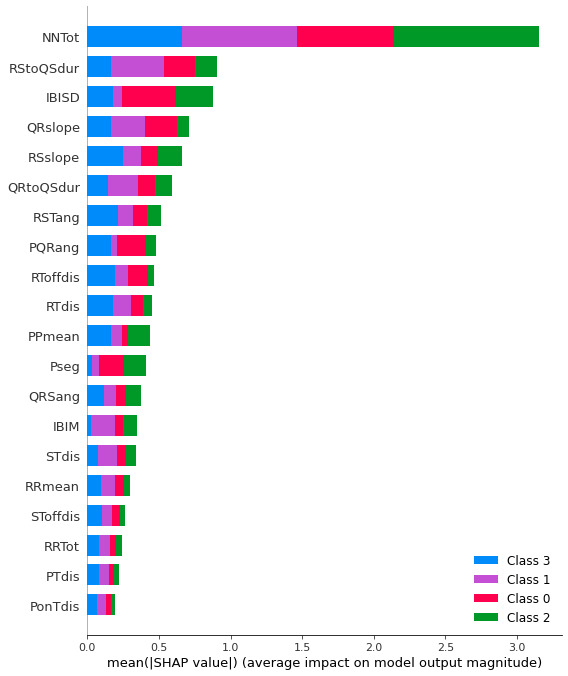

In [264]:
shap.summary_plot(shap_values, X)

#### Прогноз

In [265]:
# функция predict_proba выдает предсказания в Scikit Learn формате,
#vв первом столбце будут находится вероятности принадлежности к нулевому классу,
# во втором столбце будут находится вероятности принадлежности к первому классу и т.д.,
# в четвёртом столбце будут находится вероятности принадлежности к третьему классу

print(model.predict_proba(X_test)[:10])

[[4.25985211e-04 1.03320865e-04 3.75807146e-04 9.99094887e-01]
 [1.23316676e-02 9.34206562e-04 9.85321945e-01 1.41218102e-03]
 [1.95550258e-03 9.94684014e-01 2.34626023e-03 1.01422328e-03]
 [9.98865832e-01 2.34415402e-04 6.42097907e-04 2.57655084e-04]
 [1.50777680e-03 9.95226956e-01 2.85434547e-03 4.10922012e-04]
 [5.76741966e-04 1.25322776e-04 4.30965199e-04 9.98866970e-01]
 [6.00975082e-01 3.73015364e-02 3.54102583e-01 7.62079843e-03]
 [4.50371241e-04 1.03307946e-04 2.94208573e-04 9.99152112e-01]
 [9.87137693e-01 2.53020995e-03 8.39530914e-03 1.93678826e-03]
 [4.30905276e-02 1.07868606e-03 9.53966806e-01 1.86397985e-03]]


In [266]:
# метод predict, возвращает непосредственно классы
print(model.predict(X_test)[:15])

[['NSR']
 ['CHF']
 ['ARR']
 ['AFF']
 ['ARR']
 ['NSR']
 ['AFF']
 ['NSR']
 ['AFF']
 ['CHF']
 ['CHF']
 ['ARR']
 ['ARR']
 ['CHF']
 ['ARR']]


In [267]:
# тип предсказания «RawFormulaVal»
raw_pred = model.predict(
    X_test,
    prediction_type='RawFormulaVal'
)

print(raw_pred[:10])

[[-1.55457665 -2.97114194 -1.67990517  6.20562376]
 [ 0.0916164  -2.48861186  4.47241428 -2.07541882]
 [-1.43935729  4.79242059 -1.25718185 -2.09588145]
 [ 5.99241747 -2.36486352 -1.35721748 -2.27033647]
 [-1.45763819  5.03469636 -0.81943189 -2.75762628]
 [-1.40977798 -2.93628034 -1.70114561  6.04720393]
 [ 1.91903953 -0.86047943  1.39007271 -2.4486328 ]
 [-1.45161222 -2.92397015 -1.8773955   6.25297787]
 [ 4.24185554 -1.72465172 -0.52528089 -1.99192294]
 [ 0.93270578 -2.75485373  4.03003146 -2.20788351]]


In [299]:
# применение функции сигмойды, чтобы получить результаты предсказаний (вероятность попадания в класс) в диапазоне от 0 до 1
sigmoid = lambda x: 1 / (1 + exp(-x))
probabilities = sigmoid(raw_pred)
print(probabilities[:15])

[[0.17442624 0.04874674 0.15710803 0.99798601]
 [0.52288809 0.0766604  0.98870923 0.11150904]
 [0.1916449  0.99177584 0.2214594  0.10949777]
 [0.9975086  0.08589157 0.20469291 0.09360966]
 [0.18882882 0.99353391 0.30588427 0.05965739]
 [0.19626908 0.05038896 0.1543157  0.99764111]
 [0.87203129 0.29723919 0.80060385 0.07953859]
 [0.18975357 0.05098127 0.13268832 0.99807898]
 [0.985823   0.15127296 0.37161822 0.12005357]
 [0.71762391 0.05981311 0.98253662 0.09904478]
 [0.24251775 0.27468103 0.98694693 0.09835239]
 [0.15358721 0.99361599 0.3001412  0.07626651]
 [0.14913693 0.99489867 0.25157776 0.08005956]
 [0.44863811 0.06750318 0.99121381 0.13080239]
 [0.16982238 0.99710509 0.11307191 0.10017558]]


#### сохраним модель:

In [269]:
model.save_model('catboost_model.json')
model.save_model('catboost_model.bin')

In [271]:
# загрузка модели

model.load_model('catboost_model.bin')
print(model.get_params())

{'random_seed': 63, 'custom_metric': ['AUC', 'Accuracy'], 'learning_rate': 0.2, 'iterations': 200, 'loss_function': 'MultiClass', 'verbose': 25}


# k-Nearest Neighbours (kNN)

In [300]:
# модель KNN

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

Используем кросс-валидацию для поиска лучших параметров модели:

In [303]:
model_params = knn.get_params()
tuned_params = {}
for k, v in model_params.items():
    tuned_params[k] = [v]
tuned_params['n_neighbors'] = range(1, 30)
clf = GridSearchCV(KNeighborsClassifier(), tuned_params, cv=10, n_jobs=-1)
clf.fit(X_train, y_train)
best_params = clf.best_params_

In [304]:
best_model = KNeighborsClassifier(**best_params)
best_model.fit(X_train, y_train)
knn_predict = best_model.predict(X_test)

knn_proba_pred = best_model.predict_proba(X_test)
knn_auc = roc_auc_score(y_test, knn_proba_pred, multi_class='ovr')
num_neighbors = best_model.n_neighbors

In [306]:
print('Used params:\n', best_params)

print(f"\n Confusion matrix: \n{confusion_matrix(y_test, knn_predict)}")
print(classification_report(y_test, knn_predict))
print(f"AUC: {knn_auc}")
print(f"Number of neighbors: {num_neighbors}")

Used params:
 {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}

 Confusion matrix: 
[[119   0  10   0]
 [  0 120   0   0]
 [ 10   0 111   0]
 [  0   1   0 109]]
              precision    recall  f1-score   support

         AFF       0.92      0.92      0.92       129
         ARR       0.99      1.00      1.00       120
         CHF       0.92      0.92      0.92       121
         NSR       1.00      0.99      1.00       110

    accuracy                           0.96       480
   macro avg       0.96      0.96      0.96       480
weighted avg       0.96      0.96      0.96       480

AUC: 0.971452765436726
Number of neighbors: 1


Интерпретация матрицы неточности:

1. Истинный класс: AFF (первая строка)   
119 объектов класса AFF были правильно предсказаны как класс AFF (True Positive).   
10 объектов класса AFF были неправильно предсказаны как другой класс (False Negative).   

2. Истинный класс: ARR (вторая строка)   
120 объектов класса ARR были правильно предсказаны как класс ARR (True Positive).   
Ни одного объекта класса ARR не было неправильно предсказано как другой класс (False Negative).   

3. Истинный класс: CHF (третья строка)   
111 объектов класса CHF были правильно предсказаны как класс CHF (True Positive).   
10 объектов класса CHF были неправильно предсказаны как другой класс (False Negative).   

4. Истинный класс: NSR (четвертая строка)   
109 объектов класса NSR были правильно предсказаны как класс NSR (True Positive).   
1 объект класса NSR был неправильно предсказан как другой класс (False Negative).   

ИТОГО: верных прогнозов - 459,   
       ошибочных прогнозов - 21.   

In [307]:
# прогнозирование классов на тестовом наборе данных
print(knn_predict[:10])

['NSR' 'CHF' 'ARR' 'AFF' 'ARR' 'NSR' 'AFF' 'NSR' 'AFF' 'CHF']


In [308]:
# спрогнозируем вероятности (т. е. вероятности попадания объектов в класс)
print(knn_proba_pred[:10])

[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]


# Logistic Regression

In [184]:
logreg = LogisticRegression(
    max_iter=200,
    random_state=42,
    multi_class='ovr'
)
logreg.fit(X_train, y_train)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the doc

LogisticRegression(max_iter=200, multi_class='ovr', random_state=42)

In [185]:
logreg_predict = logreg.predict(X_test)

logreg_proba_pred = logreg.predict_proba(X_test)
logreg_auc = roc_auc_score(y_test, logreg_proba_pred, multi_class='ovr')

print(f"Confusion matrix: \n{confusion_matrix(y_test, logreg_predict)}")
print(classification_report(y_test, logreg_predict))
print(f"AUC: {logreg_auc}")

Confusion matrix: 
[[107   0  21   1]
 [  1 119   0   0]
 [ 15   0 106   0]
 [  0   0   1 109]]
              precision    recall  f1-score   support

         AFF       0.87      0.83      0.85       129
         ARR       1.00      0.99      1.00       120
         CHF       0.83      0.88      0.85       121
         NSR       0.99      0.99      0.99       110

    accuracy                           0.92       480
   macro avg       0.92      0.92      0.92       480
weighted avg       0.92      0.92      0.92       480

AUC: 0.975992827023183


Интерпретация матрицы неточности:

1. Истинный класс: AFF (первая строка)   
107 объектов класса AFF были правильно предсказаны как класс AFF (True Positive).   
21 объектов класса AFF были неправильно предсказаны как другой класс (False Negative).   

2. Истинный класс: ARR (вторая строка)   
119 объектов класса ARR были правильно предсказаны как класс ARR (True Positive).   
1 объекта класса ARR были неправильно предсказаны как другой класс (False Negative).   

3. Истинный класс: CHF (третья строка)   
106 объектов класса CHF были правильно предсказаны как класс CHF (True Positive).   
15 объектов класса CHF были неправильно предсказаны как другой класс (False Negative).   

4. Истинный класс: NSR (четвертая строка)   
109 объектов класса NSR были правильно предсказаны как класс NSR (True Positive).   
1 объект класса NSR был неправильно предсказан как другой класс (False Negative).   

ИТОГО: верных прогнозов - 442,   
       ошибочных прогнозов - 38.   

In [186]:
# прогнозирование классов на тестовом наборе данных
print(logreg_predict[:15])

['NSR' 'CHF' 'ARR' 'AFF' 'ARR' 'NSR' 'AFF' 'NSR' 'AFF' 'CHF' 'CHF' 'ARR'
 'ARR' 'CHF' 'ARR']


In [187]:
# спрогнозируем вероятности (т. е. вероятности попадания объектов в класс)
print(logreg_proba_pred[:10])

[[1.82627752e-03 2.95174250e-29 1.86024935e-03 9.96313473e-01]
 [5.64112739e-02 5.19634872e-09 9.43588125e-01 5.95582497e-07]
 [1.82180026e-01 4.61778715e-01 3.56041259e-01 7.95999171e-18]
 [8.13741642e-01 7.53376982e-10 1.86257288e-01 1.06956422e-06]
 [5.84207016e-04 6.32096085e-01 3.67319708e-01 7.15377071e-16]
 [4.99538755e-05 6.83317775e-32 1.45116144e-03 9.98498885e-01]
 [6.89390024e-01 1.01922116e-02 3.00417764e-01 9.83577849e-11]
 [2.35179587e-04 3.31690007e-30 1.86321416e-03 9.97901606e-01]
 [9.86480985e-01 2.09322947e-05 1.34980824e-02 1.39098548e-10]
 [2.99902914e-01 2.55296939e-07 7.00095102e-01 1.72867309e-06]]


# Support Vector Machine (SVM)

In [195]:
svm = SVC(random_state=42, probability=True)
svm.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [196]:
svm_predict = svm.predict(X_test)

svm_proba_pred = svm.predict_proba(X_test)
svm_auc = roc_auc_score(y_test, svm_proba_pred, multi_class='ovr')

print(f"Confusion matrix: \n{confusion_matrix(y_test, svm_predict)}")
print(classification_report(y_test, svm_predict))
print(f"AUC: {svm_auc}")

Confusion matrix: 
[[109   0  20   0]
 [  0 119   1   0]
 [ 22   0  99   0]
 [  0   1   0 109]]
              precision    recall  f1-score   support

         AFF       0.83      0.84      0.84       129
         ARR       0.99      0.99      0.99       120
         CHF       0.82      0.82      0.82       121
         NSR       1.00      0.99      1.00       110

    accuracy                           0.91       480
   macro avg       0.91      0.91      0.91       480
weighted avg       0.91      0.91      0.91       480

AUC: 0.9809638266289077


Интерпретация матрицы неточности:

1. Истинный класс: AFF (первая строка)   
109 объектов класса AFF были правильно предсказаны как класс AFF (True Positive).   
20 объектов класса AFF были неправильно предсказаны как другой класс (False Negative).   

2. Истинный класс: ARR (вторая строка)   
119 объектов класса ARR были правильно предсказаны как класс ARR (True Positive).   
1 объекта класса ARR были неправильно предсказаны как другой класс (False Negative).   

3. Истинный класс: CHF (третья строка)   
99 объектов класса CHF были правильно предсказаны как класс CHF (True Positive).   
22 объектов класса CHF были неправильно предсказаны как другой класс (False Negative).   

4. Истинный класс: NSR (четвертая строка)   
109 объектов класса NSR были правильно предсказаны как класс NSR (True Positive).   
1 объект класса NSR был неправильно предсказан как другой класс (False Negative).   

ИТОГО: верных прогнозов - 436,   
       ошибочных прогнозов - 44.   

# Сравнение моделей

In [309]:
# Создание словаря с данными
algorithm_comparison = {
    'Algorithm': ['CatBoost', 'k-Nearest Neighbours', 'Logistic Regression', 'Support Vector Machine'],
    'Precision': [0.98, 0.96, 0.92, 0.91],
    'Recall': [0.97, 0.96, 0.92, 0.91],
    'F1-Score' : [0.97, 0.96, 0.92, 0.91],
    'Accuracy' : [0.97, 0.96, 0.92, 0.91],
    'AUC' : [0.9988714124762698, 0.971452765436726, 0.975992827023183, 0.9809638266289077],
    'Верных прогнозов' : [468, 459, 442, 436],
    'Ошибочных прогнозов' : [12, 21, 38, 44]
}

algorithm_comparison_df = pd.DataFrame(algorithm_comparison)

In [310]:
algorithm_comparison_df

Algorithm  Precision  Recall  F1-Score  Accuracy       AUC  \
0                CatBoost       0.98    0.97      0.97      0.97  0.998871   
1    k-Nearest Neighbours       0.96    0.96      0.96      0.96  0.971453   
2     Logistic Regression       0.92    0.92      0.92      0.92  0.975993   
3  Support Vector Machine       0.91    0.91      0.91      0.91  0.980964   

   Верных прогнозов  Ошибочных прогнозов  
0               468                   12  
1               459                   21  
2               442                   38  
3               436                   44

# Вывод:

При сравнении этих моделей, можно заметить, что модель CatBoost демонстрирует наилучшие значения метрик Precision, Recall, F1-Score, Accuracy и AUC. 